# PROBLEM STATEMENT

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

Date - The date of the observation
AveragePrice - the average price of a single avocado
type - conventional or organic
year - the year
Region - the city or region of the observation
Total Volume - Total number of avocados sold
4046 - Total number of avocados with PLU 4046 sold
4225 - Total number of avocados with PLU 4225 sold
4770 - Total number of avocados with PLU 4770 sold


# IMPORTING THE LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import scipy as stats
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data= pd.read_excel(r"C:\Users\apkar\Downloads\avocado.xlsx")
data.head(10)

Unnamed: 0       Date  AveragePrice  Total Volume     4046       4225  \
0           0 2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1 2015-12-20          1.35      54876.98   674.28   44638.81   
2           2 2015-12-13          0.93     118220.22   794.70  109149.67   
3           3 2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4 2015-11-29          1.28      51039.60   941.48   43838.39   
5           5 2015-11-22          1.26      55979.78  1184.27   48067.99   
6           6 2015-11-15          0.99      83453.76  1368.92   73672.72   
7           7 2015-11-08          0.98     109428.33   703.75  101815.36   
8           8 2015-11-01          1.02      99811.42  1022.15   87315.57   
9           9 2015-10-25          1.07      74338.76   842.40   64757.44   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   
5   43.61     6683.91     6556.47      127.44          0.0  conventional   
6   93.26     8318.86     8196.81      122.05          0.0  conventional   
7   80.00     6829.22     6266.85      562.37          0.0  conventional   
8   85.34    11388.36    11104.53      283.83          0.0  conventional   
9  113.00     8625.92     8061.47      564.45          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015  Albany  
4  2015  Albany  
5  2015  Albany  
6  2015  Albany  
7  2015  Albany  
8  2015  Albany  
9  2015  Albany

In [3]:
# removing the coloumn unmamed as it is not necessary
data.drop('Unnamed: 0',axis=1,inplace=True)


In [4]:
data.head()

Date  AveragePrice  Total Volume     4046       4225    4770  \
0 2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1 2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2 2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3 2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4 2015-11-29          1.28      51039.60   941.48   43838.39   75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  region  
0     8696.87     8603.62       93.25          0.0  conventional  2015  Albany  
1     9505.56     9408.07       97.49          0.0  conventional  2015  Albany  
2     8145.35     8042.21      103.14          0.0  conventional  2015  Albany  
3     5811.16     5677.40      133.76          0.0  conventional  2015  Albany  
4     6183.95     5986.26      197.69          0.0  conventional  2015  Albany

In [5]:
data.shape

(18249, 13)

In [6]:
data.dtypes

Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
dtype: object

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   AveragePrice  18249 non-null  float64       
 2   Total Volume  18249 non-null  float64       
 3   4046          18249 non-null  float64       
 4   4225          18249 non-null  float64       
 5   4770          18249 non-null  float64       
 6   Total Bags    18249 non-null  float64       
 7   Small Bags    18249 non-null  float64       
 8   Large Bags    18249 non-null  float64       
 9   XLarge Bags   18249 non-null  float64       
 10  type          18249 non-null  object        
 11  year          18249 non-null  int64         
 12  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 1.8+ MB


In [8]:
# Now Seperate date and month
data["Month"] = data["Date"].dt.month
data["Day"] = data["Date"].dt.day
data.drop("Date",axis=1,inplace=True)
data.head()

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0          1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1          1.35      54876.98   674.28   44638.81   58.33     9505.56   
2          0.93     118220.22   794.70  109149.67  130.50     8145.35   
3          1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4          1.28      51039.60   941.48   43838.39   75.78     6183.95   

   Small Bags  Large Bags  XLarge Bags          type  year  region  Month  Day  
0     8603.62       93.25          0.0  conventional  2015  Albany     12   27  
1     9408.07       97.49          0.0  conventional  2015  Albany     12   20  
2     8042.21      103.14          0.0  conventional  2015  Albany     12   13  
3     5677.40      133.76          0.0  conventional  2015  Albany     12    6  
4     5986.26      197.69          0.0  conventional  2015  Albany     11   29

In [9]:
data.isnull().sum()

AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
Month           0
Day             0
dtype: int64

In [10]:
# Checking number of unique values in each column
data.nunique()

AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
Month              12
Day                31
dtype: int64

In [11]:
# Statistical summary of dataset
data.describe()

AveragePrice  Total Volume          4046          4225          4770  \
count  18249.000000  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04   
mean       1.405978  8.506440e+05  2.930084e+05  2.951546e+05  2.283974e+04   
std        0.402677  3.453545e+06  1.264989e+06  1.204120e+06  1.074641e+05   
min        0.440000  8.456000e+01  0.000000e+00  0.000000e+00  0.000000e+00   
25%        1.100000  1.083858e+04  8.540700e+02  3.008780e+03  0.000000e+00   
50%        1.370000  1.073768e+05  8.645300e+03  2.906102e+04  1.849900e+02   
75%        1.660000  4.329623e+05  1.110202e+05  1.502069e+05  6.243420e+03   
max        3.250000  6.250565e+07  2.274362e+07  2.047057e+07  2.546439e+06   

         Total Bags    Small Bags    Large Bags    XLarge Bags          year  \
count  1.824900e+04  1.824900e+04  1.824900e+04   18249.000000  18249.000000   
mean   2.396392e+05  1.821947e+05  5.433809e+04    3106.426507   2016.147899   
std    9.862424e+05  7.461785e+05  2.439660e+05   17692.894652      0.939938   
min    0.000000e+00  0.000000e+00  0.000000e+00       0.000000   2015.000000   
25%    5.088640e+03  2.849420e+03  1.274700e+02       0.000000   2015.000000   
50%    3.974383e+04  2.636282e+04  2.647710e+03       0.000000   2016.000000   
75%    1.107834e+05  8.333767e+04  2.202925e+04     132.500000   2017.000000   
max    1.937313e+07  1.338459e+07  5.719097e+06  551693.650000   2018.000000   

              Month           Day  
count  18249.000000  18249.000000  
mean       6.177215     15.662612  
std        3.534130      8.776281  
min        1.000000      1.000000  
25%        3.000000      8.000000  
50%        6.000000     16.000000  
75%        9.000000     23.000000  
max       12.000000     31.000000

From this we can observe there is outliers present as there is huge difference between mean and 75%,max for XLarge bags,Large Bags. also there is skewness present because there is higher standard deviation for Total Bags,small bags,XlargeBags

# visualization of data

In [12]:
# Now seperating numerical columns
numerical_col=[]
for i in data.dtypes.index:
    if data.dtypes[i]!='object':
        numerical_col.append(i)
print(numerical_col)

['AveragePrice', 'Total Volume', 4046, 4225, 4770, 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year', 'Month', 'Day']


In [13]:
# seprerating categorical columns
categorical_col=[]
for i in data.dtypes.index:
    if data.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)

['type', 'region']


# Univariate Analysis

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64


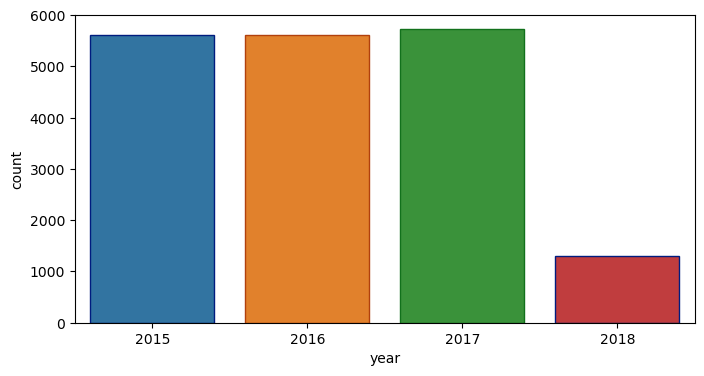

In [14]:
#Visualize the count of year
print(data["year"].value_counts())
plt.figure(figsize=(8,4))

sns.countplot(data["year"],edgecolor=sns.color_palette("dark", 3))
plt.show()

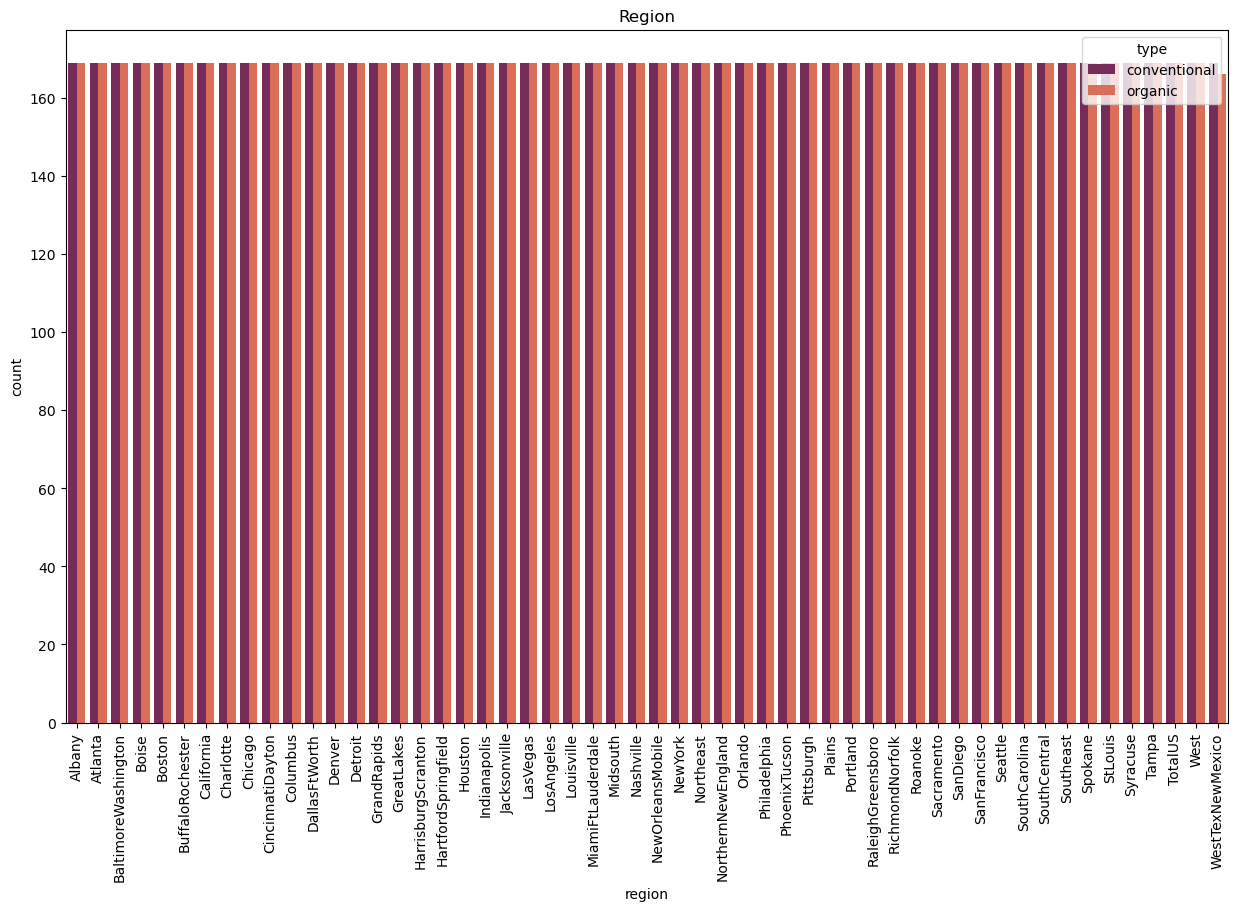

In [15]:
#Visualize the count of Region
plt.figure(figsize=(15,9))
sns.countplot(data["region"],palette="rocket",hue=data['type'])
plt.title("Region")
plt.xticks(rotation=90)
plt.show()


# Multivariate Analysis

<Figure size 2500x2500 with 0 Axes>

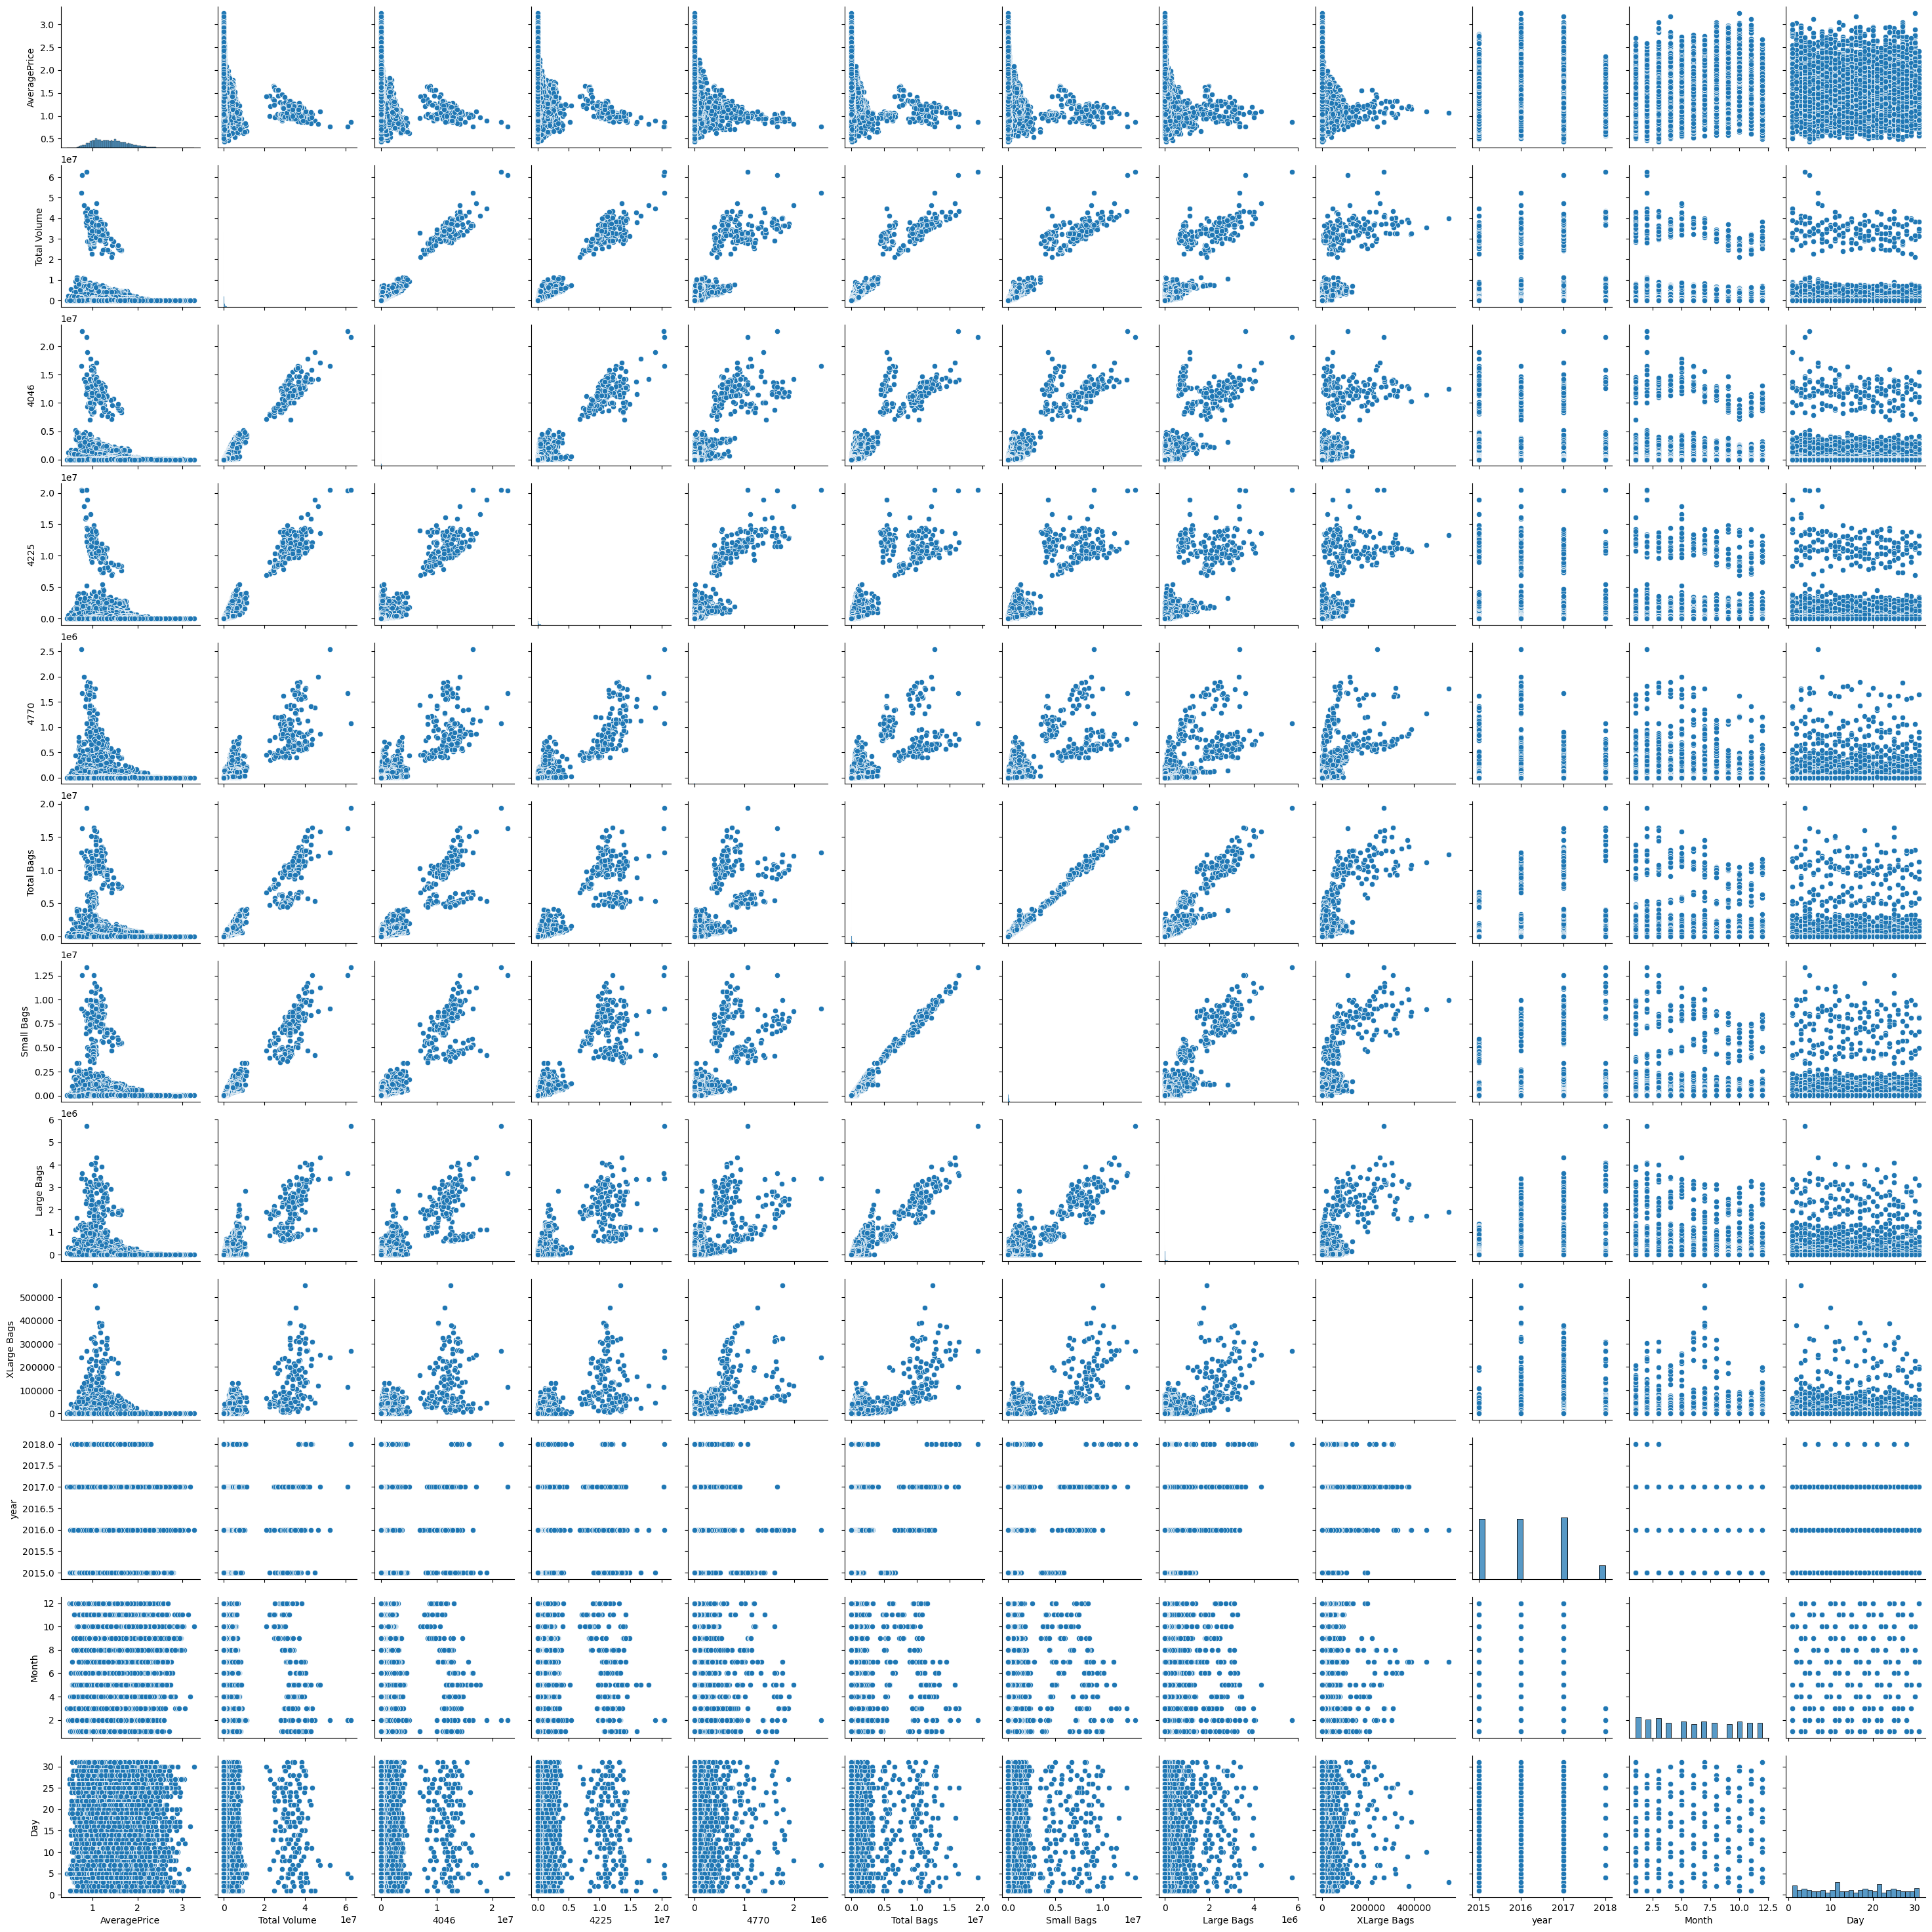

In [16]:
plt.figure(figsize=(25,25)) 
sns.pairplot(data)
plt.show()

From this plot,we can see there is strong relation between small bag and Total bag

# Comparision

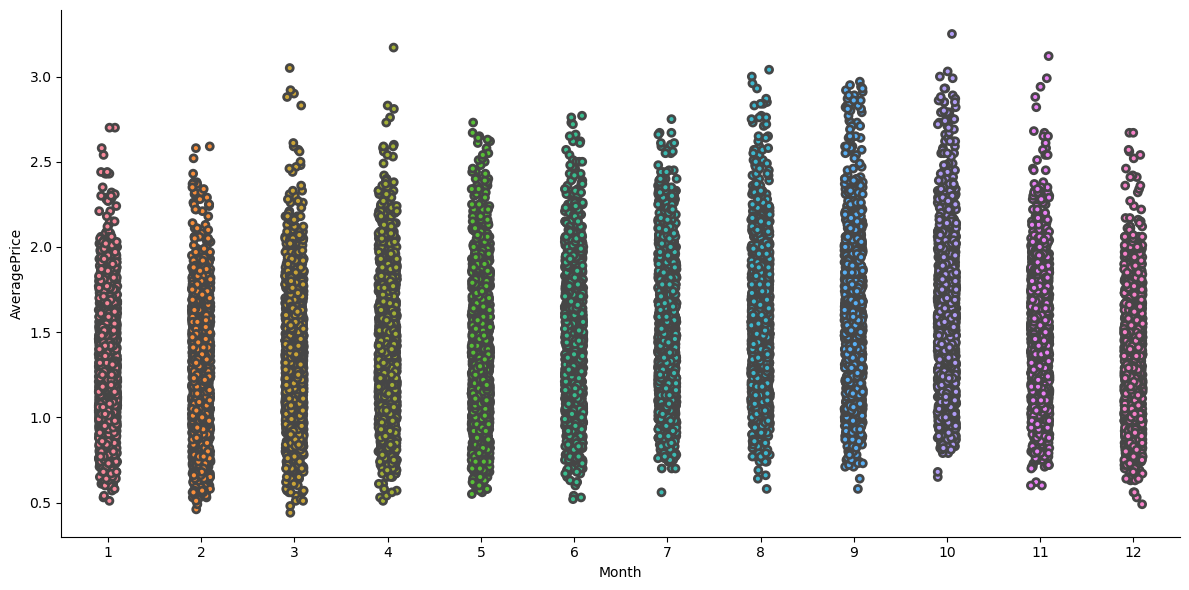

In [17]:
# Relationship between Average Price and Month
sns.catplot(x = "Month", y = "AveragePrice", kind="strip",data=data,height=6, linewidth=2, aspect=2)
plt.show()

From this plot we can conclude the sales are high in month of aug,sep,oct

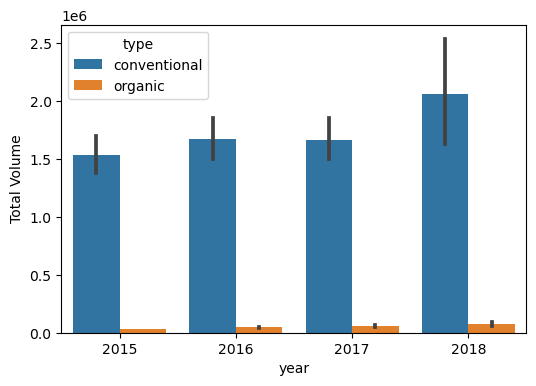

In [18]:
plt.figure(figsize=(6,4))
sns.barplot(x='year',y='Total Volume',hue="type",data=data)
plt.show()

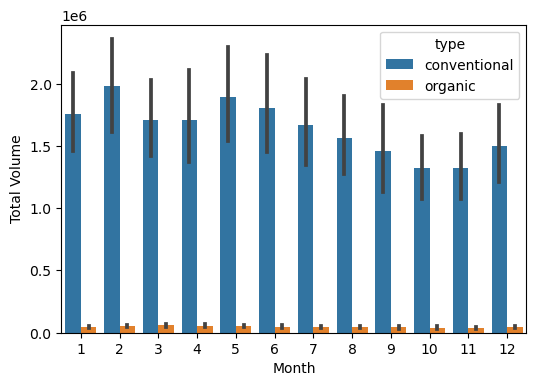

In [19]:
plt.figure(figsize=(6,4))
sns.barplot(x='Month',y='Total Volume',hue="type",data=data)
plt.show()

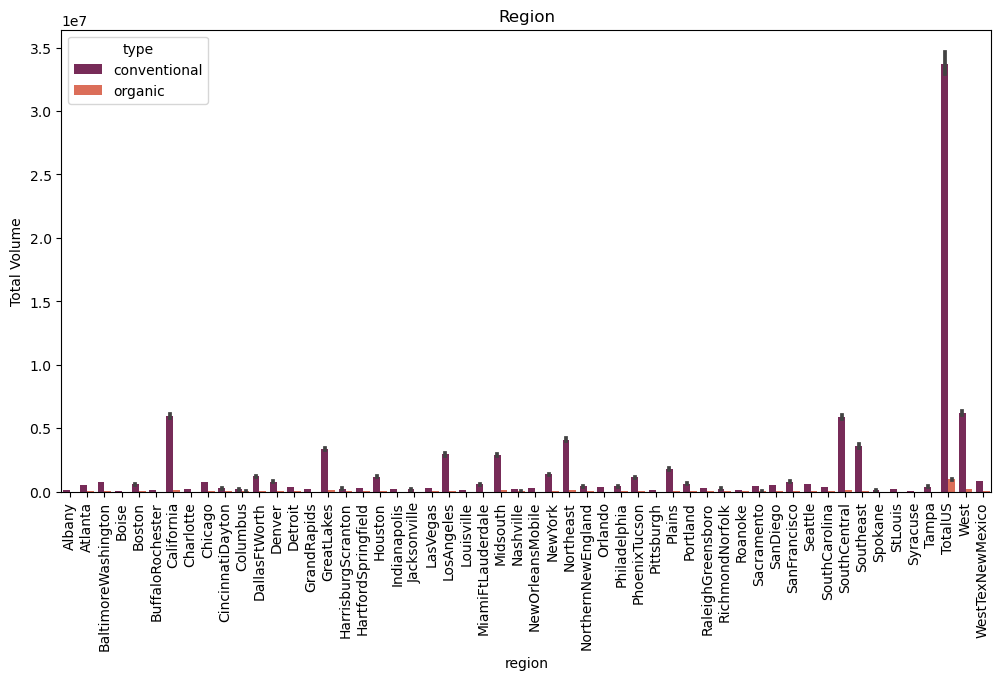

In [20]:
plt.figure(figsize=(12,6))
sns.barplot(data["region"],data['Total Volume'],palette="rocket",hue=data['type'])
plt.title("Region")
plt.xticks(rotation=90)
plt.show()

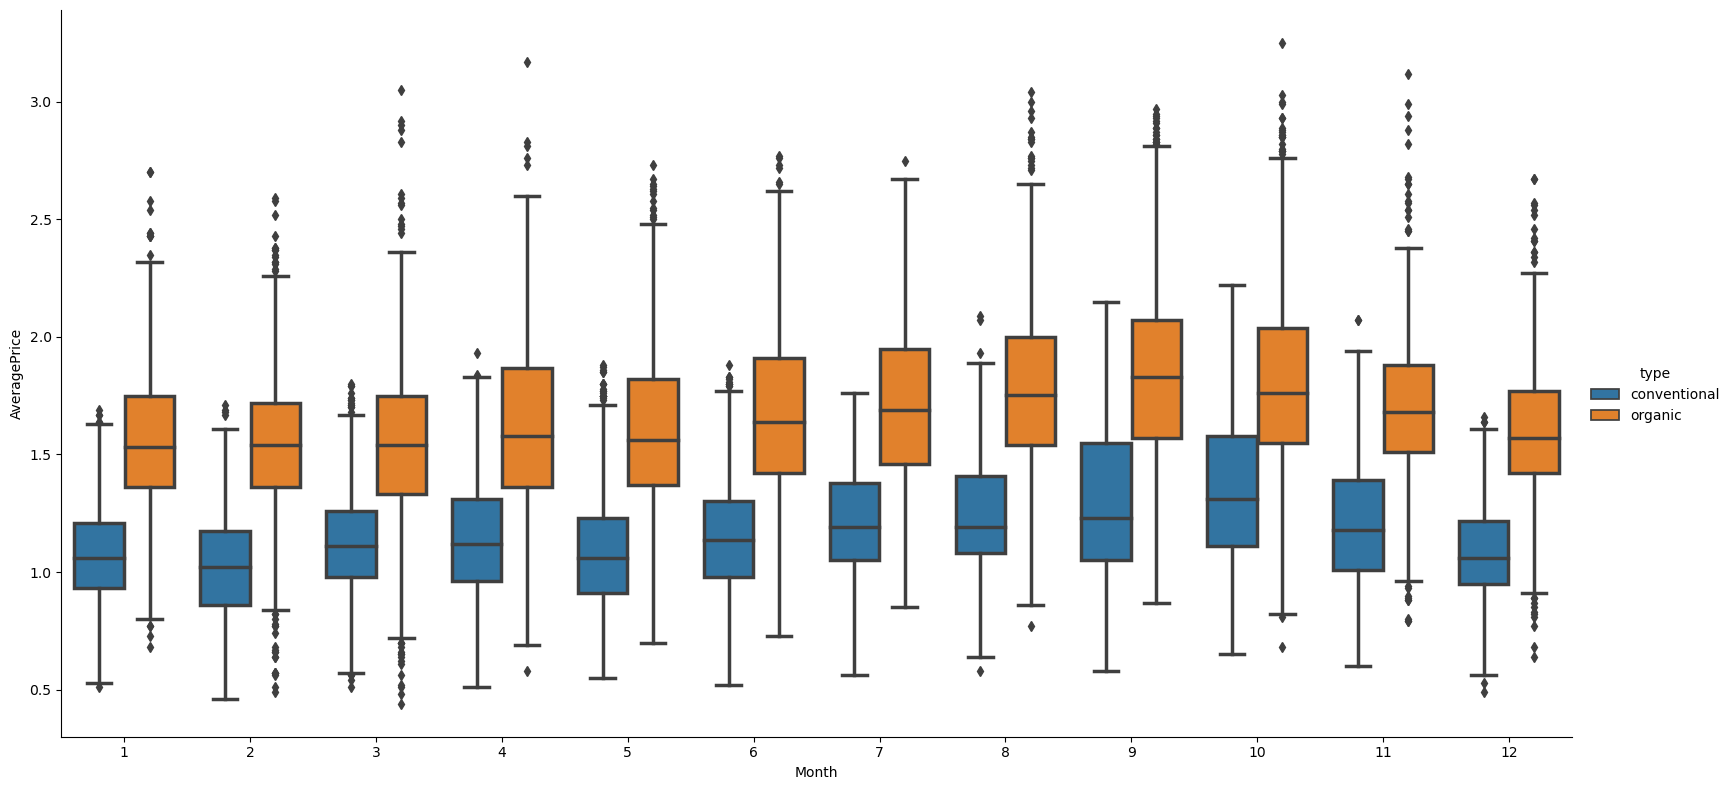

In [21]:
#Relation between month and Average PRice
sns.catplot(x="Month", y="AveragePrice", hue="type", 
            kind="box", data=data, height=8, linewidth=2.5, aspect=2);

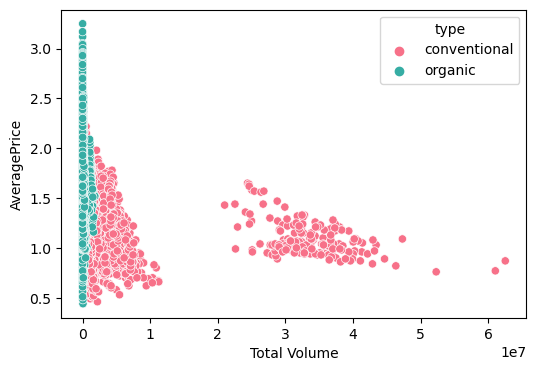

In [22]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="Total Volume",y="AveragePrice",hue="type",data=data,palette="husl")
plt.show()

From the above plot we can understand organic Avacado price were higher when compared to conventional one

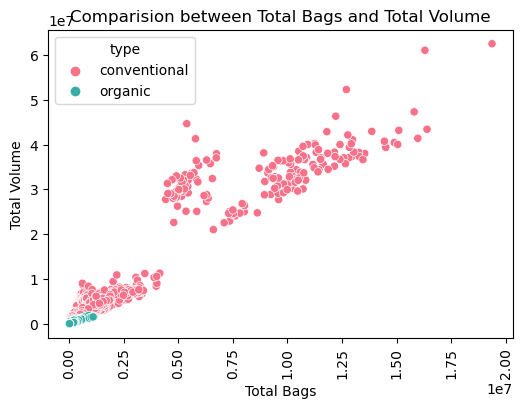

In [23]:
###comparision between total bags and volume)
plt.figure(figsize=(6,4))
plt.title("Comparision between Total Bags and Total Volume")
sns.scatterplot(x='Total Bags',y='Total Volume',hue="type",data=data,palette="husl")
plt.xticks(rotation=90)
plt.show()

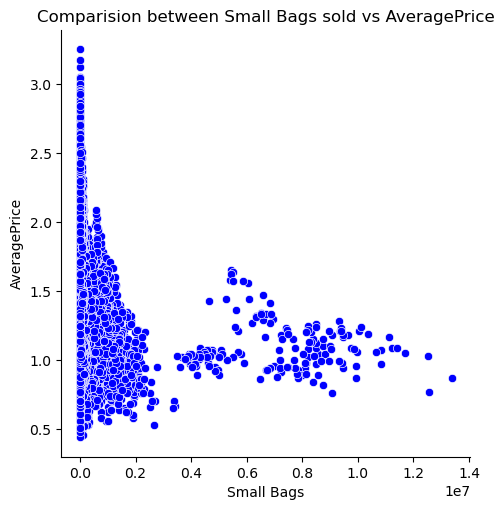

In [24]:
# Comparision between Small Bags sold vs AveragePrice:
sns.relplot(data['Small Bags'],data['AveragePrice'],color="b");
plt.title("Comparision between Small Bags sold vs AveragePrice")
plt.xlabel("Small Bags")
plt.ylabel("AveragePrice")
plt.show()


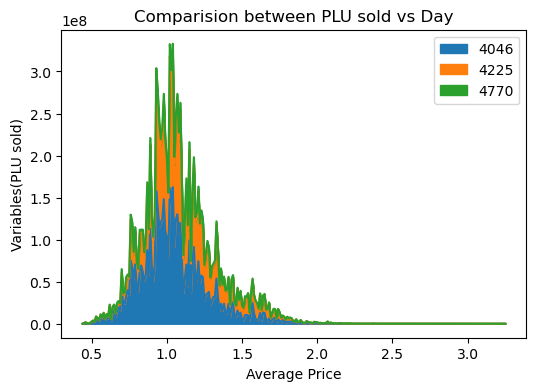

In [25]:
# Type of PLU sold and Average Price
variables = data[[4046, 4225, 4770]].groupby(data.AveragePrice).sum()
variables.plot(kind='area', fontsize=10,figsize=(6,4))
plt.title("Comparision between PLU sold vs Day")
plt.xlabel("Average Price")
plt.ylabel("Variables(PLU sold)")
plt.show()

we can see PLU 4770 price was higher

# Checking the Outlier

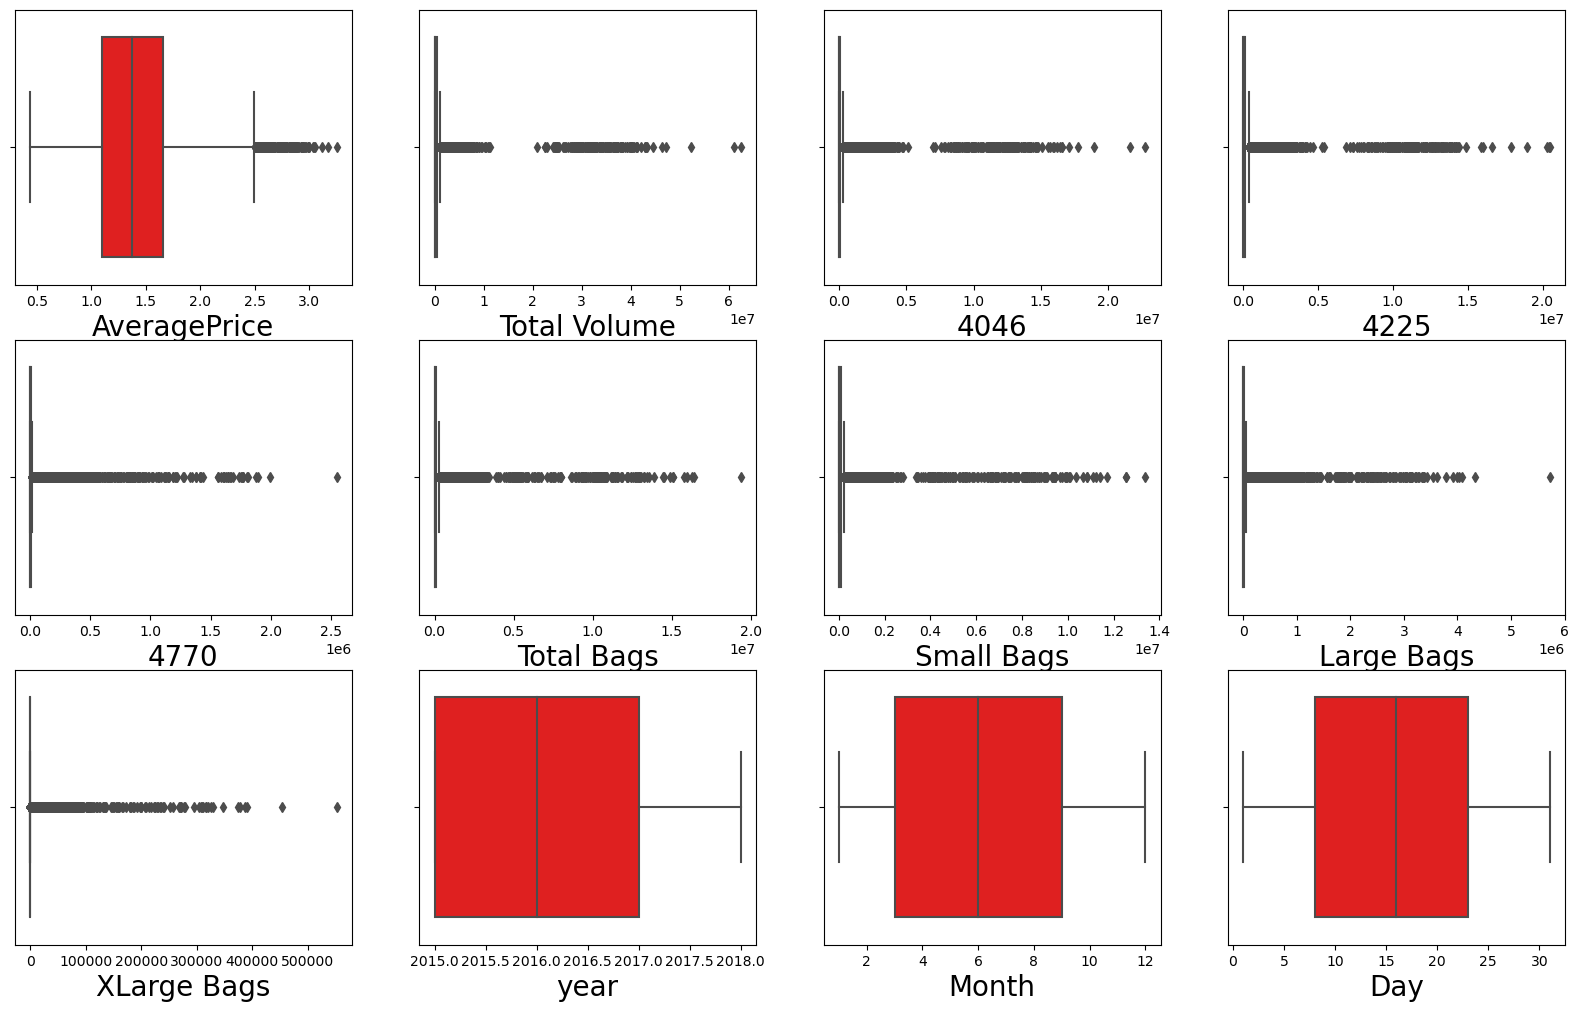

In [26]:
numerical_col=['AveragePrice', 'Total Volume', 4046, 4225, 4770, 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year','Month', 'Day']
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in numerical_col:
    if plotnumber<=18:
        ax = plt.subplot(6,4,plotnumber)
        sns.boxplot(data[column],color='r')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

we can see outliers in the plt.we will remove it by zscore method

# ZScore

In [27]:
# Features containing outliers
feature_cols = data[['Total Volume', 4046, 4225, 4770, 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']]
# Using zscore to remove outliers
from scipy.stats import zscore

z=np.abs(zscore(feature_cols))

z

Total Volume      4046      4225      4770  Total Bags  Small Bags  \
0          0.227716  0.230816  0.199902  0.212091    0.234170    0.232647   
1          0.230427  0.231103  0.208054  0.211997    0.233350    0.231568   
2          0.212085  0.231007  0.154478  0.211325    0.234730    0.233399   
3          0.223444  0.230741  0.185350  0.211864    0.237096    0.236568   
4          0.231538  0.230891  0.208719  0.211834    0.236718    0.236154   
...             ...       ...       ...       ...         ...         ...   
18244      0.241373  0.230017  0.243857  0.212540    0.229301    0.226665   
18245      0.242296  0.230693  0.242277  0.212540    0.233594    0.232196   
18246      0.242331  0.230693  0.243090  0.205766    0.233463    0.231644   
18247      0.241625  0.230428  0.242651  0.205774    0.231866    0.229543   
18248      0.241253  0.229347  0.243170  0.210450    0.230807    0.228111   

       Large Bags  XLarge Bags  
0        0.222352      0.17558  
1        0.222335      0.17558  
2        0.222311      0.17558  
3        0.222186      0.17558  
4        0.221924      0.17558  
...           ...          ...  
18244    0.220964      0.17558  
18245    0.221403      0.17558  
18246    0.222561      0.17558  
18247    0.222529      0.17558  
18248    0.222628      0.17558  

[18249 rows x 8 columns]

In [28]:
# Creating new dataframe by removing zscore
new_df = data[(z<3).all(axis=1)] 
new_df

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0              1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1              1.35      54876.98   674.28   44638.81   58.33     9505.56   
2              0.93     118220.22   794.70  109149.67  130.50     8145.35   
3              1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4              1.28      51039.60   941.48   43838.39   75.78     6183.95   
...             ...           ...      ...        ...     ...         ...   
18244          1.63      17074.83  2046.96    1529.20    0.00    13498.67   
18245          1.71      13888.04  1191.70    3431.50    0.00     9264.84   
18246          1.87      13766.76  1191.92    2452.79  727.94     9394.11   
18247          1.93      16205.22  1527.63    2981.04  727.01    10969.54   
18248          1.62      17489.58  2894.77    2356.13  224.53    12014.15   

       Small Bags  Large Bags  XLarge Bags          type  year  \
0         8603.62       93.25          0.0  conventional  2015   
1         9408.07       97.49          0.0  conventional  2015   
2         8042.21      103.14          0.0  conventional  2015   
3         5677.40      133.76          0.0  conventional  2015   
4         5986.26      197.69          0.0  conventional  2015   
...           ...         ...          ...           ...   ...   
18244    13066.82      431.85          0.0       organic  2018   
18245     8940.04      324.80          0.0       organic  2018   
18246     9351.80       42.31          0.0       organic  2018   
18247    10919.54       50.00          0.0       organic  2018   
18248    11988.14       26.01          0.0       organic  2018   

                 region  Month  Day  
0                Albany     12   27  
1                Albany     12   20  
2                Albany     12   13  
3                Albany     12    6  
4                Albany     11   29  
...                 ...    ...  ...  
18244  WestTexNewMexico      2    4  
18245  WestTexNewMexico      1   28  
18246  WestTexNewMexico      1   21  
18247  WestTexNewMexico      1   14  
18248  WestTexNewMexico      1    7  

[17782 rows x 14 columns]

In [29]:
data.shape

(18249, 14)

In [30]:
new_df.shape

(17782, 14)

In [31]:
# % of data loss 
(18249-17782)/18249*100

2.55904433119623

as loss of data is 2.55% it is acceptable

# Distribution of Data

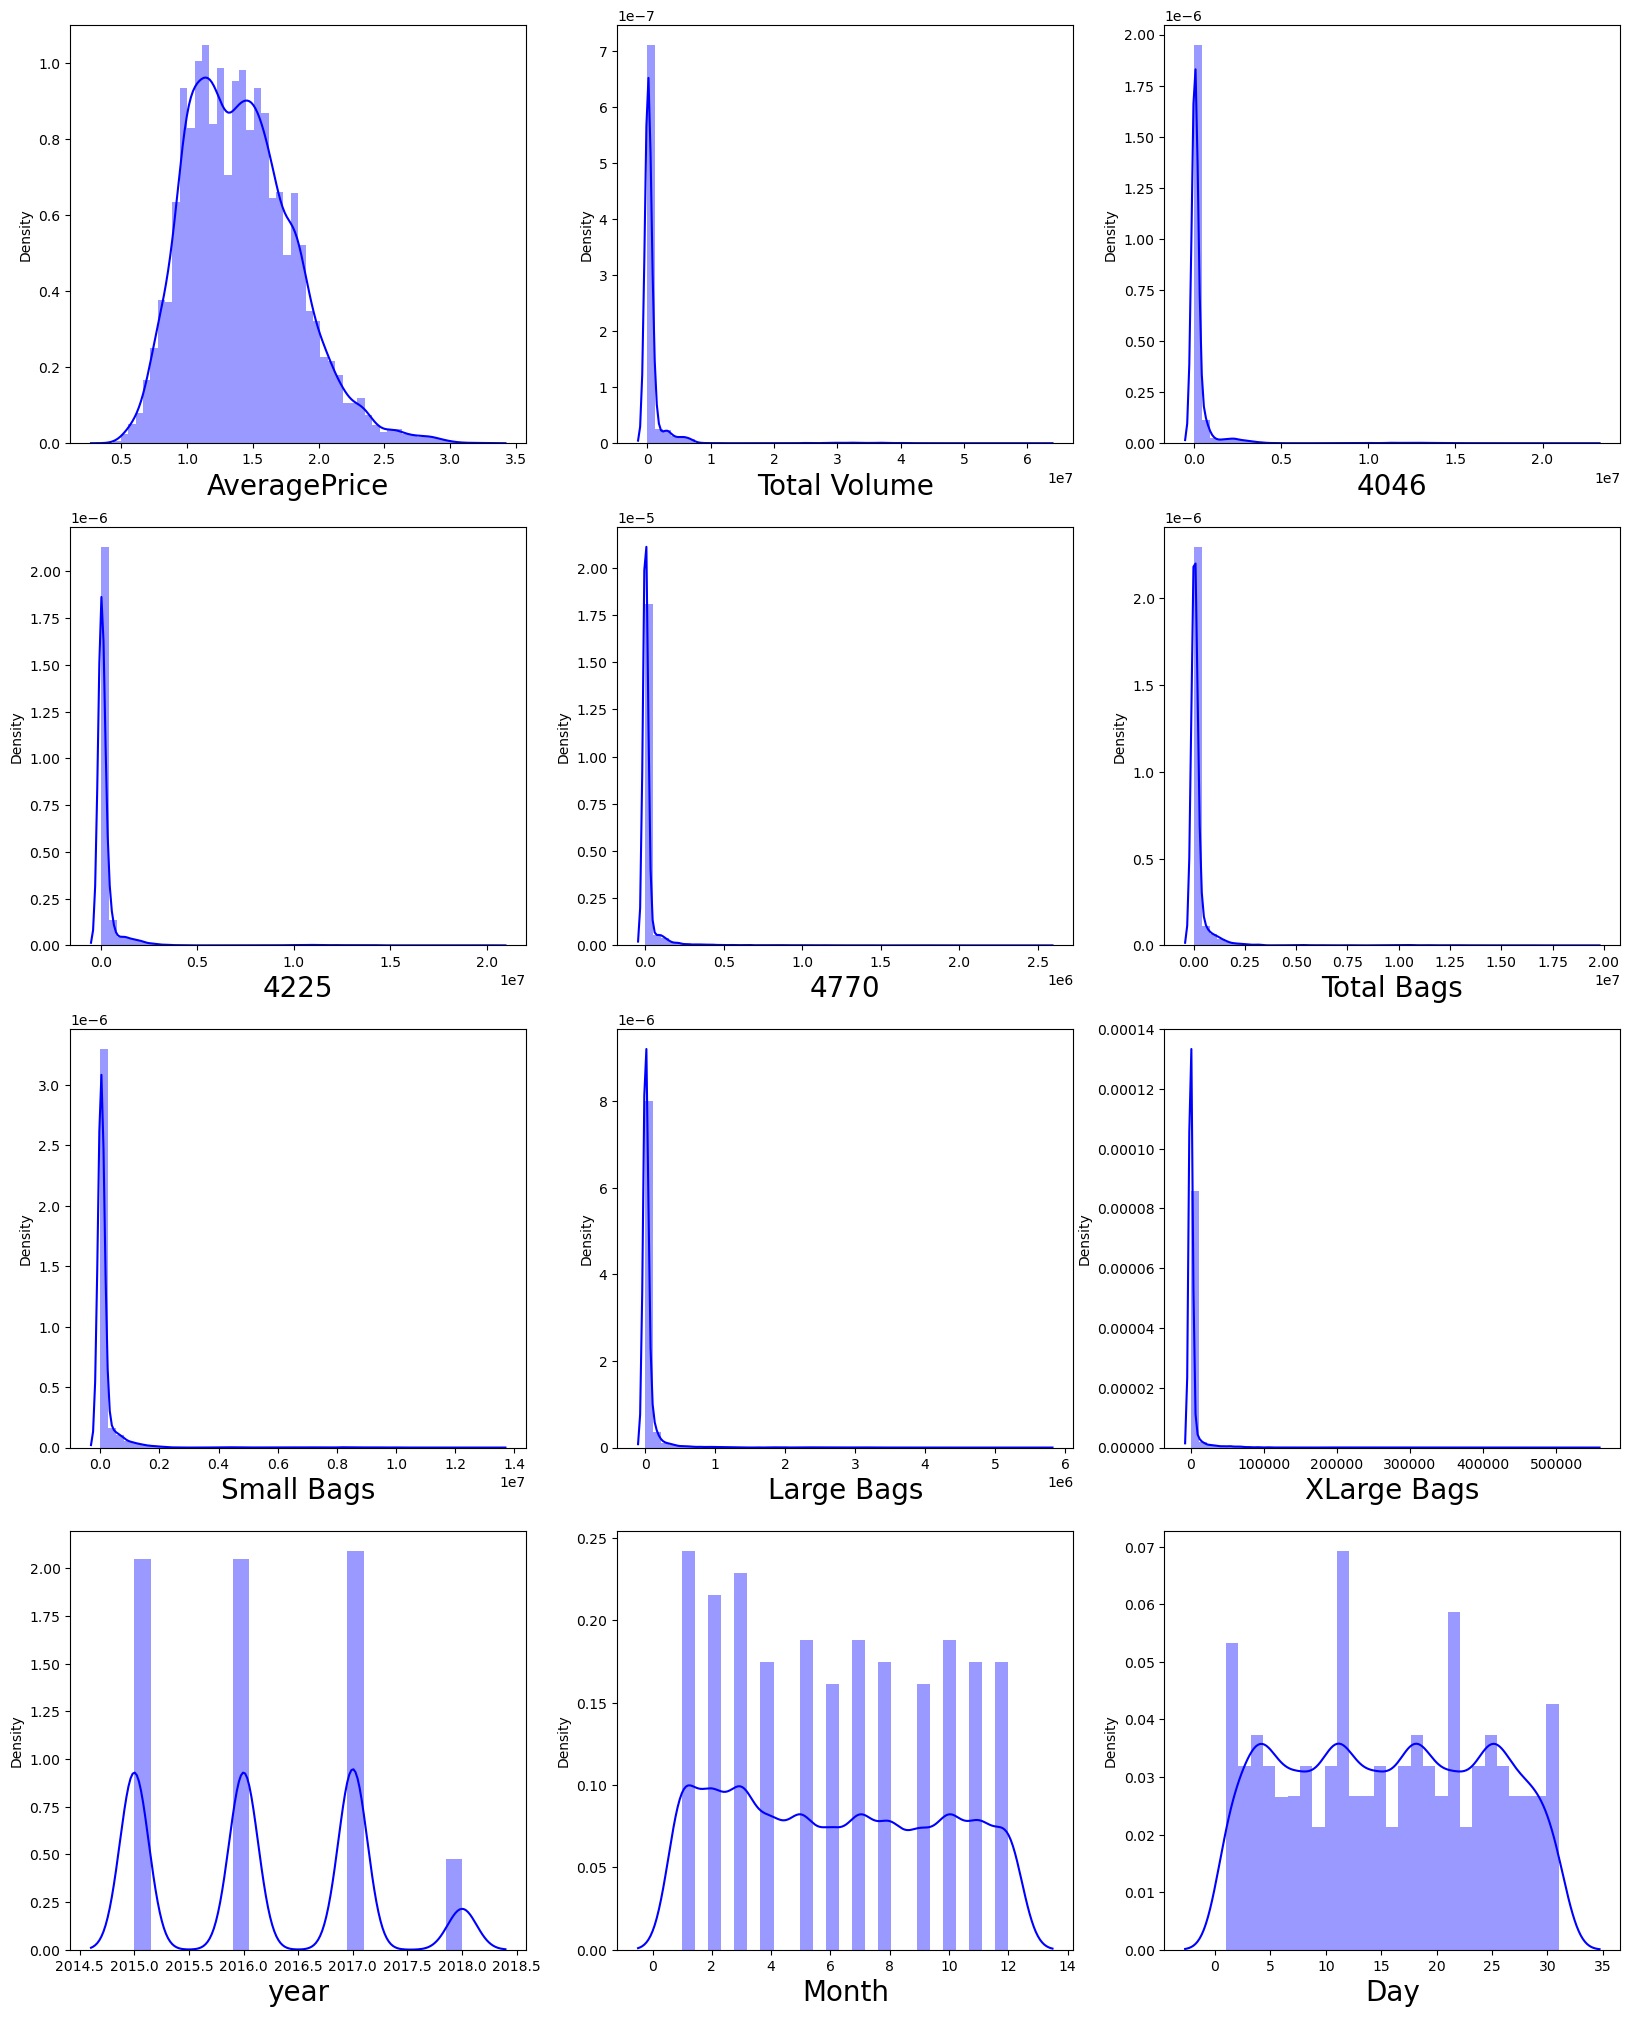

In [32]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in numerical_col:
    if plotnumber<=14:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(data[column],color='b')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

Skewness were present in our dataset

# Skewness  Removal

In [33]:
new_df.skew().sort_values(ascending=False)

XLarge Bags     6.159391
4770            5.137120
Large Bags      5.072468
4046            4.928850
4225            4.472729
Small Bags      4.238647
Total Bags      4.082103
Total Volume    3.782060
AveragePrice    0.560969
year            0.220792
Month           0.098217
Day             0.011251
dtype: float64

In [34]:
# Removing skewness using yeo-johnson method to get better prediction
features = ['Total Volume', 4046, 4225, 4770, 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']
from sklearn.preprocessing import PowerTransformer
sk = PowerTransformer(method='yeo-johnson')
new_df[features] = sk.fit_transform(new_df[features].values)
new_df[features].head()

Total Volume      4046      4225      4770  Total Bags  Small Bags  \
0     -0.065094 -0.649918  0.358278 -0.212550   -0.527445   -0.337064   
1     -0.137269 -0.770067  0.276355 -0.165117   -0.488205   -0.301038   
2      0.215503 -0.724508  0.656010  0.034215   -0.556204   -0.364044   
3      0.029840 -0.625017  0.475615 -0.110976   -0.702370   -0.500341   
4     -0.170456 -0.677083  0.268966 -0.100289   -0.675712   -0.479918   

   Large Bags  XLarge Bags  
0   -0.775214    -0.675702  
1   -0.765237    -0.675702  
2   -0.752534    -0.675702  
3   -0.693012    -0.675702  
4   -0.600755    -0.675702

In [35]:
new_df.skew()

AveragePrice    0.560969
Total Volume   -0.006809
4046           -0.038259
4225           -0.043246
4770            0.028015
Total Bags     -0.021531
Small Bags     -0.024657
Large Bags     -0.110061
XLarge Bags     0.860603
year            0.220792
Month           0.098217
Day             0.011251
dtype: float64

Mostly our skewness is reduced,but XLarge bags have some skewness

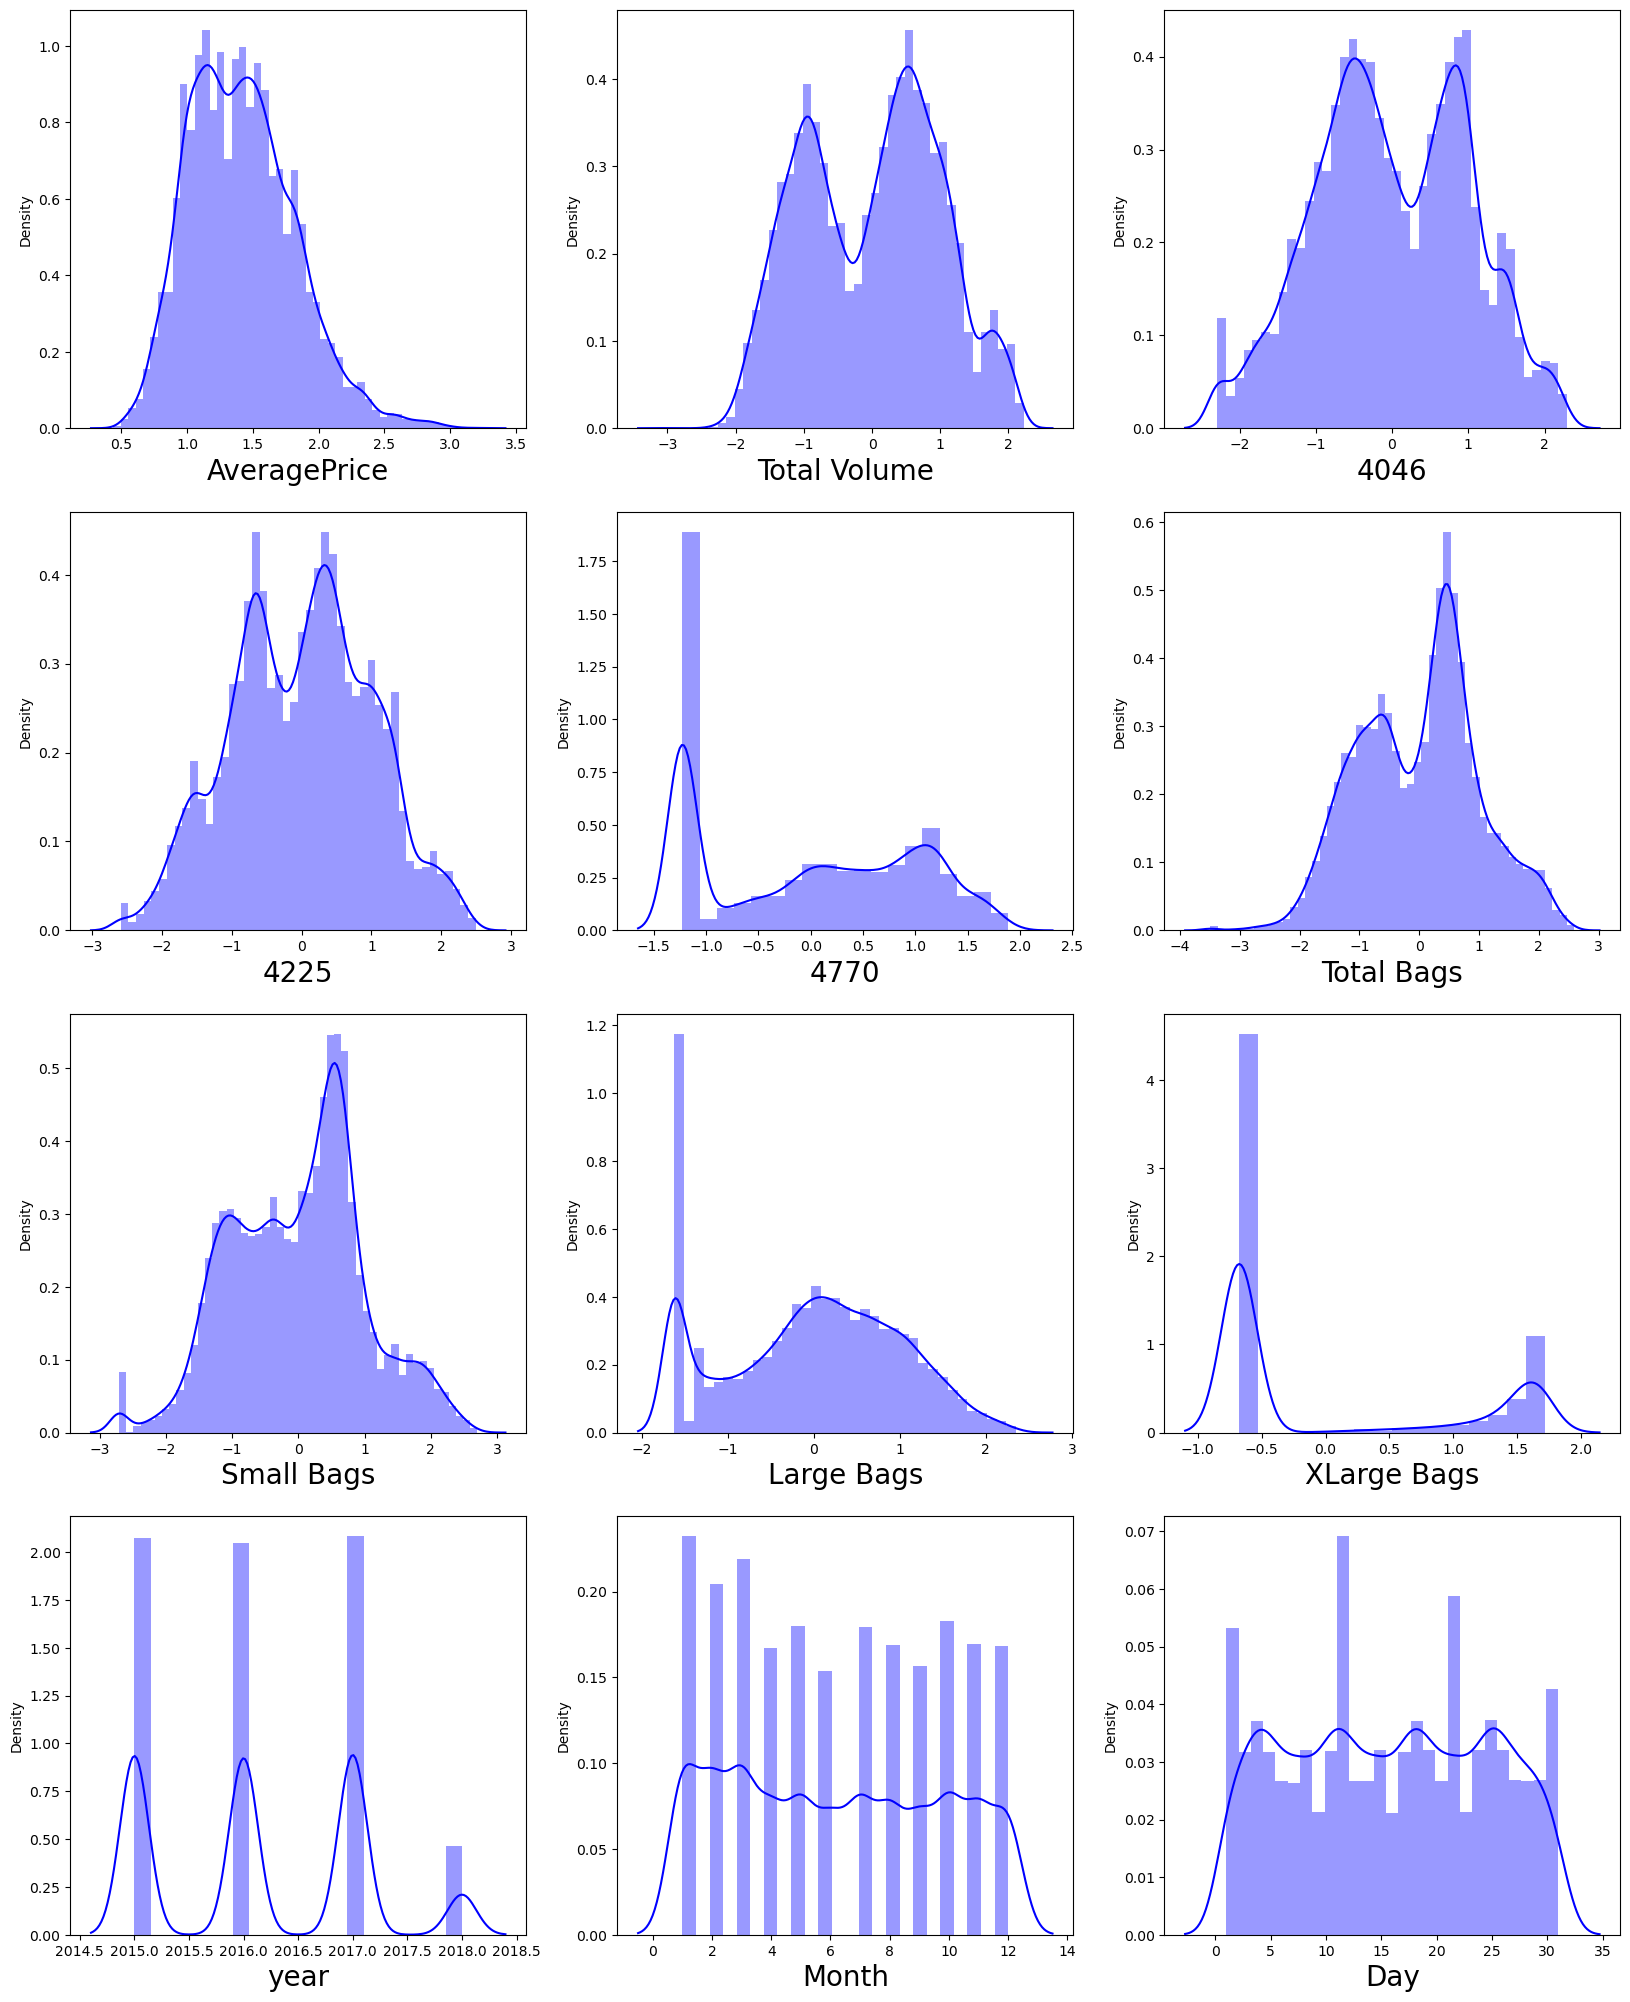

In [36]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in numerical_col:
    if plotnumber<=14:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(new_df[column],color='b')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()


In [37]:
# let us try one more time for removal
f1=["XLarge Bags"]
new_df[f1] = sk.fit_transform(new_df[f1].values)
new_df.skew()

AveragePrice    0.560969
Total Volume   -0.006809
4046           -0.038259
4225           -0.043246
4770            0.028015
Total Bags     -0.021531
Small Bags     -0.024657
Large Bags     -0.110061
XLarge Bags     0.774360
year            0.220792
Month           0.098217
Day             0.011251
dtype: float64

# Encoding

In [38]:
categorical_col = ["type","region"]
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
new_df[categorical_col]= new_df[categorical_col].apply(LE.fit_transform)
new_df[categorical_col]

type  region
0         0       0
1         0       0
2         0       0
3         0       0
4         0       0
...     ...     ...
18244     1      53
18245     1      53
18246     1      53
18247     1      53
18248     1      53

[17782 rows x 2 columns]

In [39]:
# Checking the correlation between features and the target
cor = new_df.corr()
cor

AveragePrice  Total Volume      4046      4225      4770  \
AveragePrice      1.000000     -0.576829 -0.548618 -0.448579 -0.491320   
Total Volume     -0.576829      1.000000  0.889083  0.924160  0.818568   
4046             -0.548618      0.889083  1.000000  0.764679  0.736523   
4225             -0.448579      0.924160  0.764679  1.000000  0.796799   
4770             -0.491320      0.818568  0.736523  0.796799  1.000000   
Total Bags       -0.564616      0.939776  0.799354  0.818511  0.761641   
Small Bags       -0.493621      0.905098  0.778765  0.784901  0.754305   
Large Bags       -0.477879      0.681427  0.601899  0.614878  0.548457   
XLarge Bags      -0.393183      0.628368  0.574325  0.581506  0.616048   
type              0.608447     -0.800828 -0.725826 -0.747722 -0.780988   
year              0.099910      0.076584 -0.002396 -0.004533 -0.051657   
region            0.010428      0.065709  0.159390  0.032273  0.037805   
Month             0.157900     -0.026332 -0.025919 -0.024708 -0.017377   
Day               0.024742     -0.006248 -0.004558 -0.005919  0.001383   

              Total Bags  Small Bags  Large Bags  XLarge Bags      type  \
AveragePrice   -0.564616   -0.493621   -0.477879    -0.393183  0.608447   
Total Volume    0.939776    0.905098    0.681427     0.628368 -0.800828   
4046            0.799354    0.778765    0.601899     0.574325 -0.725826   
4225            0.818511    0.784901    0.614878     0.581506 -0.747722   
4770            0.761641    0.754305    0.548457     0.616048 -0.780988   
Total Bags      1.000000    0.949901    0.729652     0.610683 -0.725686   
Small Bags      0.949901    1.000000    0.566307     0.599307 -0.720466   
Large Bags      0.729652    0.566307    1.000000     0.450416 -0.500026   
XLarge Bags     0.610683    0.599307    0.450416     1.000000 -0.673459   
type           -0.725686   -0.720466   -0.500026    -0.673459  1.000000   
year            0.210924    0.185955    0.190295     0.154530  0.007399   
region          0.065996    0.051985    0.086573    -0.016357  0.021970   
Month          -0.014571   -0.010260   -0.016942     0.021642 -0.005044   
Day            -0.003703   -0.000535   -0.000876     0.011273 -0.002469   

                  year    region     Month       Day  
AveragePrice  0.099910  0.010428  0.157900  0.024742  
Total Volume  0.076584  0.065709 -0.026332 -0.006248  
4046         -0.002396  0.159390 -0.025919 -0.004558  
4225         -0.004533  0.032273 -0.024708 -0.005919  
4770         -0.051657  0.037805 -0.017377  0.001383  
Total Bags    0.210924  0.065996 -0.014571 -0.003703  
Small Bags    0.185955  0.051985 -0.010260 -0.000535  
Large Bags    0.190295  0.086573 -0.016942 -0.000876  
XLarge Bags   0.154530 -0.016357  0.021642  0.011273  
type          0.007399  0.021970 -0.005044 -0.002469  
year          1.000000 -0.003610 -0.173166  0.004044  
region       -0.003610  1.000000  0.002175  0.000751  
Month        -0.173166  0.002175  1.000000  0.010456  
Day           0.004044  0.000751  0.010456  1.000000

# Heatmap

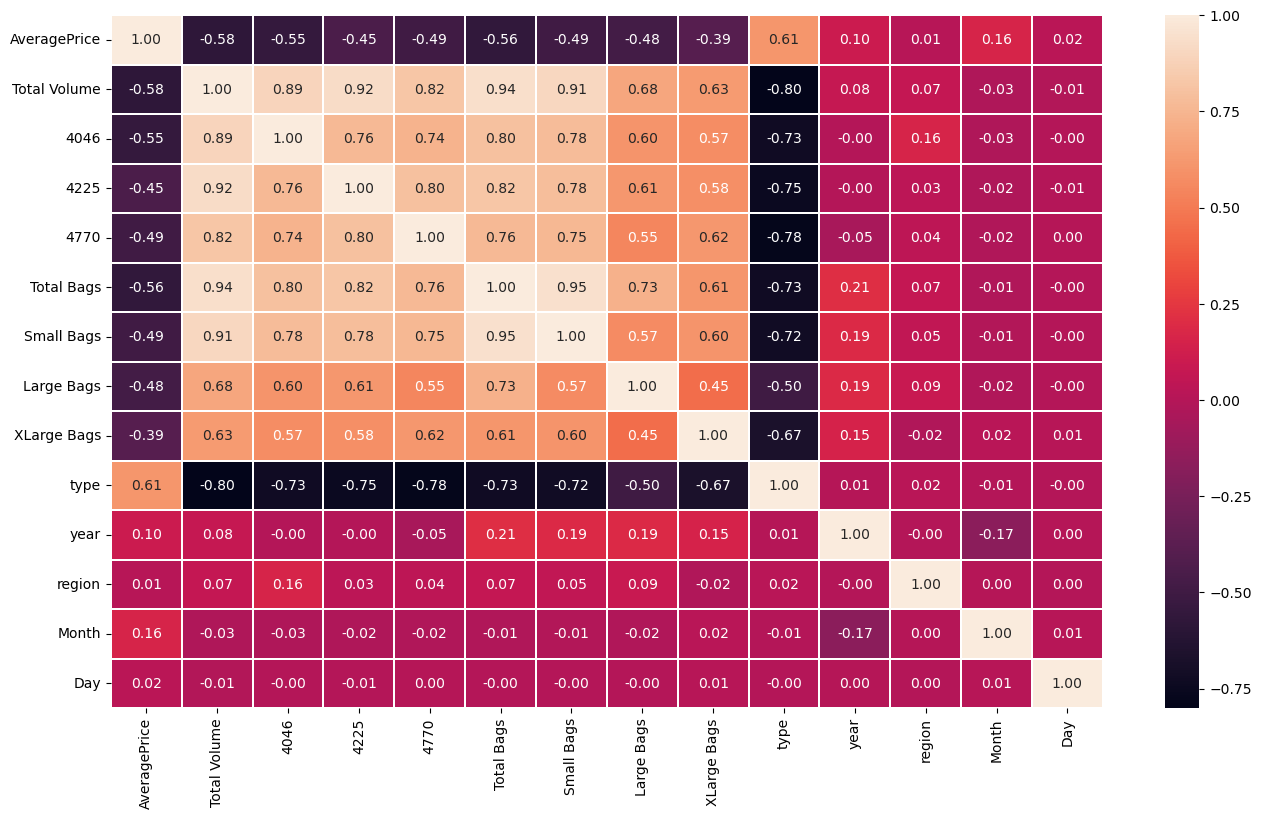

In [40]:

plt.figure(figsize=(16,9))
sns.heatmap(new_df.corr(),linewidths=.1,fmt='0.2f', annot = True)
plt.yticks(rotation=0);

Most feature are related to target variablet which leads to multicollinearity problem

In [41]:
# Dropping the columns
new_df.drop("region",axis=1, inplace=True)
new_df.drop("XLarge Bags",axis=1, inplace=True)

In [42]:
new_df

AveragePrice  Total Volume      4046      4225      4770  Total Bags  \
0              1.33     -0.065094 -0.649918  0.358278 -0.212550   -0.527445   
1              1.35     -0.137269 -0.770067  0.276355 -0.165117   -0.488205   
2              0.93      0.215503 -0.724508  0.656010  0.034215   -0.556204   
3              1.08      0.029840 -0.625017  0.475615 -0.110976   -0.702370   
4              1.28     -0.170456 -0.677083  0.268966 -0.100289   -0.675712   
...             ...           ...       ...       ...       ...         ...   
18244          1.63     -0.668931 -0.454078 -0.922232 -1.224990   -0.331042   
18245          1.71     -0.762380 -0.610403 -0.665649 -1.224990   -0.499550   
18246          1.87     -0.766344 -0.610350 -0.774395  0.455355   -0.493424   
18247          1.93     -0.692595 -0.539211 -0.711605  0.455045   -0.424475   
18248          1.62     -0.658062 -0.351503 -0.787209  0.168008   -0.383676   

       Small Bags  Large Bags  type  year  Month  Day  
0       -0.337064   -0.775214     0  2015     12   27  
1       -0.301038   -0.765237     0  2015     12   20  
2       -0.364044   -0.752534     0  2015     12   13  
3       -0.500341   -0.693012     0  2015     12    6  
4       -0.479918   -0.600755     0  2015     11   29  
...           ...         ...   ...   ...    ...  ...  
18244   -0.165765   -0.405895     1  2018      2    4  
18245   -0.321645   -0.478556     1  2018      1   28  
18246   -0.303466   -0.945246     1  2018      1   21  
18247   -0.240252   -0.910471     1  2018      1   14  
18248   -0.201685   -1.042930     1  2018      1    7  

[17782 rows x 12 columns]

# Splitting feature and Target variable

In [43]:
x = new_df.drop("AveragePrice", axis=1)
y = new_df["AveragePrice"]

In [44]:
x

Total Volume      4046      4225      4770  Total Bags  Small Bags  \
0         -0.065094 -0.649918  0.358278 -0.212550   -0.527445   -0.337064   
1         -0.137269 -0.770067  0.276355 -0.165117   -0.488205   -0.301038   
2          0.215503 -0.724508  0.656010  0.034215   -0.556204   -0.364044   
3          0.029840 -0.625017  0.475615 -0.110976   -0.702370   -0.500341   
4         -0.170456 -0.677083  0.268966 -0.100289   -0.675712   -0.479918   
...             ...       ...       ...       ...         ...         ...   
18244     -0.668931 -0.454078 -0.922232 -1.224990   -0.331042   -0.165765   
18245     -0.762380 -0.610403 -0.665649 -1.224990   -0.499550   -0.321645   
18246     -0.766344 -0.610350 -0.774395  0.455355   -0.493424   -0.303466   
18247     -0.692595 -0.539211 -0.711605  0.455045   -0.424475   -0.240252   
18248     -0.658062 -0.351503 -0.787209  0.168008   -0.383676   -0.201685   

       Large Bags  type  year  Month  Day  
0       -0.775214     0  2015     12   27  
1       -0.765237     0  2015     12   20  
2       -0.752534     0  2015     12   13  
3       -0.693012     0  2015     12    6  
4       -0.600755     0  2015     11   29  
...           ...   ...   ...    ...  ...  
18244   -0.405895     1  2018      2    4  
18245   -0.478556     1  2018      1   28  
18246   -0.945246     1  2018      1   21  
18247   -0.910471     1  2018      1   14  
18248   -1.042930     1  2018      1    7  

[17782 rows x 11 columns]

In [45]:
y

0        1.33
1        1.35
2        0.93
3        1.08
4        1.28
         ... 
18244    1.63
18245    1.71
18246    1.87
18247    1.93
18248    1.62
Name: AveragePrice, Length: 17782, dtype: float64

# Scaling the Data

In [46]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

Total Volume      4046      4225      4770  Total Bags  Small Bags  \
0         -0.065094 -0.649918  0.358278 -0.212550   -0.527445   -0.337064   
1         -0.137269 -0.770067  0.276355 -0.165117   -0.488205   -0.301038   
2          0.215503 -0.724508  0.656010  0.034215   -0.556204   -0.364044   
3          0.029840 -0.625017  0.475615 -0.110976   -0.702370   -0.500341   
4         -0.170456 -0.677083  0.268966 -0.100289   -0.675712   -0.479918   
...             ...       ...       ...       ...         ...         ...   
17777     -0.668931 -0.454078 -0.922232 -1.224990   -0.331042   -0.165765   
17778     -0.762380 -0.610403 -0.665649 -1.224990   -0.499550   -0.321645   
17779     -0.766344 -0.610350 -0.774395  0.455355   -0.493424   -0.303466   
17780     -0.692595 -0.539211 -0.711605  0.455045   -0.424475   -0.240252   
17781     -0.658062 -0.351503 -0.787209  0.168008   -0.383676   -0.201685   

       Large Bags      type      year     Month       Day  
0       -0.775214 -1.026443 -1.214908  1.641434  1.289235  
1       -0.765237 -1.026443 -1.214908  1.641434  0.491750  
2       -0.752534 -1.026443 -1.214908  1.641434 -0.305734  
3       -0.693012 -1.026443 -1.214908  1.641434 -1.103219  
4       -0.600755 -1.026443 -1.214908  1.358706  1.517088  
...           ...       ...       ...       ...       ...  
17777   -0.405895  0.974238  1.979143 -1.185845 -1.331072  
17778   -0.478556  0.974238  1.979143 -1.468572  1.403161  
17779   -0.945246  0.974238  1.979143 -1.468572  0.605677  
17780   -0.910471  0.974238  1.979143 -1.468572 -0.191808  
17781   -1.042930  0.974238  1.979143 -1.468572 -0.989293  

[17782 rows x 11 columns]

# VIF for multicolloinearity

In [47]:


from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns


vif

VIF values      Features
0    51.519431  Total Volume
1     6.752126          4046
2    11.107325          4225
3     3.890095          4770
4    34.408868    Total Bags
5    16.622534    Small Bags
6     3.460516    Large Bags
7     3.320393          type
8     1.332874          year
9     1.048738         Month
10    1.000631           Day

In [48]:
# Dropping the column Total Bags
x.drop("Total Bags",axis=1, inplace=True)

In [49]:
x

Total Volume      4046      4225      4770  Small Bags  Large Bags  \
0         -0.065094 -0.649918  0.358278 -0.212550   -0.337064   -0.775214   
1         -0.137269 -0.770067  0.276355 -0.165117   -0.301038   -0.765237   
2          0.215503 -0.724508  0.656010  0.034215   -0.364044   -0.752534   
3          0.029840 -0.625017  0.475615 -0.110976   -0.500341   -0.693012   
4         -0.170456 -0.677083  0.268966 -0.100289   -0.479918   -0.600755   
...             ...       ...       ...       ...         ...         ...   
17777     -0.668931 -0.454078 -0.922232 -1.224990   -0.165765   -0.405895   
17778     -0.762380 -0.610403 -0.665649 -1.224990   -0.321645   -0.478556   
17779     -0.766344 -0.610350 -0.774395  0.455355   -0.303466   -0.945246   
17780     -0.692595 -0.539211 -0.711605  0.455045   -0.240252   -0.910471   
17781     -0.658062 -0.351503 -0.787209  0.168008   -0.201685   -1.042930   

           type      year     Month       Day  
0     -1.026443 -1.214908  1.641434  1.289235  
1     -1.026443 -1.214908  1.641434  0.491750  
2     -1.026443 -1.214908  1.641434 -0.305734  
3     -1.026443 -1.214908  1.641434 -1.103219  
4     -1.026443 -1.214908  1.358706  1.517088  
...         ...       ...       ...       ...  
17777  0.974238  1.979143 -1.185845 -1.331072  
17778  0.974238  1.979143 -1.468572  1.403161  
17779  0.974238  1.979143 -1.468572  0.605677  
17780  0.974238  1.979143 -1.468572 -0.191808  
17781  0.974238  1.979143 -1.468572 -0.989293  

[17782 rows x 10 columns]

In [50]:
# Checking VIF again
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns


vif

VIF values      Features
0   36.655341  Total Volume
1    6.032782          4046
2    9.932006          4225
3    3.886417          4770
4    7.643315    Small Bags
5    2.102990    Large Bags
6    3.283398          type
7    1.305229          year
8    1.046372         Month
9    1.000594           Day

# MODEL BUILDING(Regression)

In [51]:
# Finding best random state
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor as KNN
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state=i)
    mod = KNN()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu," on Random_state ",maxRS)

Maximum r2 score is  0.8010386317475304  on Random_state  49


In [52]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=49)

In [53]:
from sklearn.linear_model import LinearRegression, Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import cross_val_score

# support vector regressor

In [54]:
# Checking R2 score for Support Vector Machine Regressor
svr=SVR()
svr.fit(x_train,y_train)


predsvr=svr.predict(x_test)
print('R2_Score:',r2_score(y_test,predsvr))
print('MAE:',mean_absolute_error(y_test, predsvr))
print('MSE:',mean_squared_error(y_test, predsvr))
print("RMSE:",np.sqrt(mean_squared_error(y_test, predsvr)))

# Checking cv score for SVR 
print("Cross_Validaton_Score",cross_val_score(svr,x,y,cv=5).mean())

R2_Score: 0.7698854556589798
MAE: 0.14193809914214917
MSE: 0.03795379590484803
RMSE: 0.19481733984645214
Cross_Validaton_Score 0.18605815975802625


# Random Forest Regressor

In [55]:
# Checking R2 score for  Random Forest Regressor
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)

pred_RFR=RFR.predict(x_test)
print('R2_Score:',r2_score(y_test,pred_RFR))
print('MAE:',mean_absolute_error(y_test, pred_RFR))
print('MSE:',mean_squared_error(y_test, pred_RFR))
print("RMSE:",np.sqrt(mean_squared_error(y_test, pred_RFR)))

# Checking cv score for Random Forest Regression
print("Cross_Validaton_Score",cross_val_score(RFR,x,y,cv=5).mean())

R2_Score: 0.8665527581812875
MAE: 0.103592839737582
MSE: 0.022010035891283974
RMSE: 0.14835779686718178
Cross_Validaton_Score 0.20989249584820557


# Linear Regression

In [56]:
# Checking r2score for Linear Regression
LR = LinearRegression()
LR.fit(x_train,y_train)
predLR=LR.predict(x_test)
print('R2_score:',r2_score(y_test,predLR))
print('MAE:',mean_absolute_error(y_test, predLR))
print('MSE:',mean_squared_error(y_test, predLR))
print("RMSE:",np.sqrt(mean_squared_error(y_test, predLR)))

# Checking cv score for Linear Regression
print("Cross_Validaton_Score",cross_val_score(LR,x,y,cv=5).mean())

R2_score: 0.5470411520986231
MAE: 0.21089548137234337
MSE: 0.07470847927398652
RMSE: 0.2733285189547306
Cross_Validaton_Score 0.20217204304746278


# KNN Regressor

In [57]:
# Checking R2 score for KNN Regressor
knn=KNN()
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
print('R2_Score:',r2_score(y_test,predknn))
print('MAE:',mean_absolute_error(y_test, predknn))
print('MSE:',mean_squared_error(y_test, predknn))
print("RMSE:",np.sqrt(mean_squared_error(y_test, predknn)))

# Checking cv score for KNN
print("Cross_Validaton_Score",cross_val_score(knn,x,y,cv=5).mean())

R2_Score: 0.8010386317475304
MAE: 0.13058144329896906
MSE: 0.032815566635426424
RMSE: 0.18115067384756378
Cross_Validaton_Score 0.12260919939063734


# Gradient Boosting Regressor

In [58]:
# Checking R2 score for  GradientBoosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
GB=GradientBoostingRegressor()
GB.fit(x_train,y_train)

predGB=GB.predict(x_test)
print('R2_Score:',r2_score(y_test,predGB))
print('MAE:',mean_absolute_error(y_test, predGB))
print('MSE:',mean_squared_error(y_test, predGB))
print("RMSE:",np.sqrt(mean_squared_error(y_test, predGB)))

# Checking cv score for GradientBoosting Regressor
print("Cross_Validaton_Score",cross_val_score(GB,x,y,cv=5).mean())

R2_Score: 0.7144793234474924
MAE: 0.162971437159996
MSE: 0.04709217105559663
RMSE: 0.2170073064567104
Cross_Validaton_Score 0.34755106835320443


# Gradient Descent Regressor

In [59]:
# Checking R2 score for Gradient Descent Regressor
SGD=SGDRegressor()
SGD.fit(x_train,y_train)
predSGD=SGD.predict(x_test)
print('R2_Score:',r2_score(y_test,predSGD))
print('MAE:',mean_absolute_error(y_test, predSGD))
print('MSE:',mean_squared_error(y_test, predSGD))
print("RMSE:",np.sqrt(mean_squared_error(y_test, predSGD)))

# Checking cv score for Stochastic Gradient Descent Regressor
print("Cross_Validaton_Score",cross_val_score(SGD,x,y,cv=5).mean())

R2_Score: 0.5433250143855753
MAE: 0.21202088325408847
MSE: 0.07532139808239657
RMSE: 0.2744474413843142
Cross_Validaton_Score 0.19323463836060015


From the models above,we can conclude KNN Regressor  is the best fit model

# HyperParameter Tuning

In [60]:
from sklearn.model_selection import GridSearchCV
#KNeighbors Regressor
parameters = {'n_neighbors':[2,3,4,5,6],
              'algorithm':['auto','ball_tree', 'kd_tree', 'brute'],
              'leaf_size':[10,20,30,40,50],
              'weights':['uniform','distance']}
GCV=GridSearchCV(KNN(),parameters,cv=5)

In [61]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 20, 30, 40, 50],
                         'n_neighbors': [2, 3, 4, 5, 6],
                         'weights': ['uniform', 'distance']})

In [62]:
avocado_model =KNN(algorithm='auto', leaf_size=10, n_neighbors=4, weights='distance')
avocado_model.fit(x_train, y_train)
pred = avocado_model.predict(x_test)
print("RMSE value:",np.sqrt(mean_squared_error(y_test, pred_RFR)))
print('R2_Score:',r2_score(y_test,pred)*100)

RMSE value: 0.14835779686718178
R2_Score: 80.44624045546817


# Saving the model

In [63]:

import joblib
joblib.dump(avocado_model,"Avocado_price.pkl")

['Avocado_price.pkl']

# Classification Problem(Region)

In [64]:
data= pd.read_excel(r"C:\Users\apkar\Downloads\avocado.xlsx")
data.head(10)

Unnamed: 0       Date  AveragePrice  Total Volume     4046       4225  \
0           0 2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1 2015-12-20          1.35      54876.98   674.28   44638.81   
2           2 2015-12-13          0.93     118220.22   794.70  109149.67   
3           3 2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4 2015-11-29          1.28      51039.60   941.48   43838.39   
5           5 2015-11-22          1.26      55979.78  1184.27   48067.99   
6           6 2015-11-15          0.99      83453.76  1368.92   73672.72   
7           7 2015-11-08          0.98     109428.33   703.75  101815.36   
8           8 2015-11-01          1.02      99811.42  1022.15   87315.57   
9           9 2015-10-25          1.07      74338.76   842.40   64757.44   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   
5   43.61     6683.91     6556.47      127.44          0.0  conventional   
6   93.26     8318.86     8196.81      122.05          0.0  conventional   
7   80.00     6829.22     6266.85      562.37          0.0  conventional   
8   85.34    11388.36    11104.53      283.83          0.0  conventional   
9  113.00     8625.92     8061.47      564.45          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015  Albany  
4  2015  Albany  
5  2015  Albany  
6  2015  Albany  
7  2015  Albany  
8  2015  Albany  
9  2015  Albany

In [65]:
data['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [66]:
data["region"].value_counts()

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

In [67]:
data.shape

(18249, 14)

# Encoding Categorical coloumn

In [68]:
class_df = data

In [69]:
categorical_col = ["type","region"]
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
class_df[categorical_col]= class_df[categorical_col].apply(LE.fit_transform)
class_df[categorical_col]

type  region
0         0       0
1         0       0
2         0       0
3         0       0
4         0       0
...     ...     ...
18244     1      53
18245     1      53
18246     1      53
18247     1      53
18248     1      53

[18249 rows x 2 columns]

In [70]:
class_df.corr()

Unnamed: 0  AveragePrice  Total Volume      4046      4225  \
Unnamed: 0      1.000000     -0.133008      0.014035  0.017628  0.019829   
AveragePrice   -0.133008      1.000000     -0.192752 -0.208317 -0.172928   
Total Volume    0.014035     -0.192752      1.000000  0.977863  0.974181   
4046            0.017628     -0.208317      0.977863  1.000000  0.926110   
4225            0.019829     -0.172928      0.974181  0.926110  1.000000   
4770            0.041752     -0.179446      0.872202  0.833389  0.887855   
Total Bags     -0.002219     -0.177088      0.963047  0.920057  0.905787   
Small Bags      0.000347     -0.174730      0.967238  0.925280  0.916031   
Large Bags     -0.009196     -0.172940      0.880640  0.838645  0.810015   
XLarge Bags    -0.011546     -0.117592      0.747157  0.699377  0.688809   
type           -0.000288      0.615845     -0.232434 -0.225819 -0.232289   
year           -0.171667      0.093197      0.017193  0.003353 -0.009559   
region         -0.000489     -0.011716      0.174176  0.192073  0.145726   

                  4770  Total Bags  Small Bags  Large Bags  XLarge Bags  \
Unnamed: 0    0.041752   -0.002219    0.000347   -0.009196    -0.011546   
AveragePrice -0.179446   -0.177088   -0.174730   -0.172940    -0.117592   
Total Volume  0.872202    0.963047    0.967238    0.880640     0.747157   
4046          0.833389    0.920057    0.925280    0.838645     0.699377   
4225          0.887855    0.905787    0.916031    0.810015     0.688809   
4770          1.000000    0.792314    0.802733    0.698471     0.679861   
Total Bags    0.792314    1.000000    0.994335    0.943009     0.804233   
Small Bags    0.802733    0.994335    1.000000    0.902589     0.806845   
Large Bags    0.698471    0.943009    0.902589    1.000000     0.710858   
XLarge Bags   0.679861    0.804233    0.806845    0.710858     1.000000   
type         -0.210027   -0.217788   -0.220535   -0.193177    -0.175483   
year         -0.036531    0.071552    0.063915    0.087891     0.081033   
region        0.095252    0.175256    0.164702    0.198768     0.082281   

                  type      year    region  
Unnamed: 0   -0.000288 -0.171667 -0.000489  
AveragePrice  0.615845  0.093197 -0.011716  
Total Volume -0.232434  0.017193  0.174176  
4046         -0.225819  0.003353  0.192073  
4225         -0.232289 -0.009559  0.145726  
4770         -0.210027 -0.036531  0.095252  
Total Bags   -0.217788  0.071552  0.175256  
Small Bags   -0.220535  0.063915  0.164702  
Large Bags   -0.193177  0.087891  0.198768  
XLarge Bags  -0.175483  0.081033  0.082281  
type          1.000000 -0.000032 -0.000280  
year         -0.000032  1.000000 -0.000055  
region       -0.000280 -0.000055  1.000000

# HEATMAP

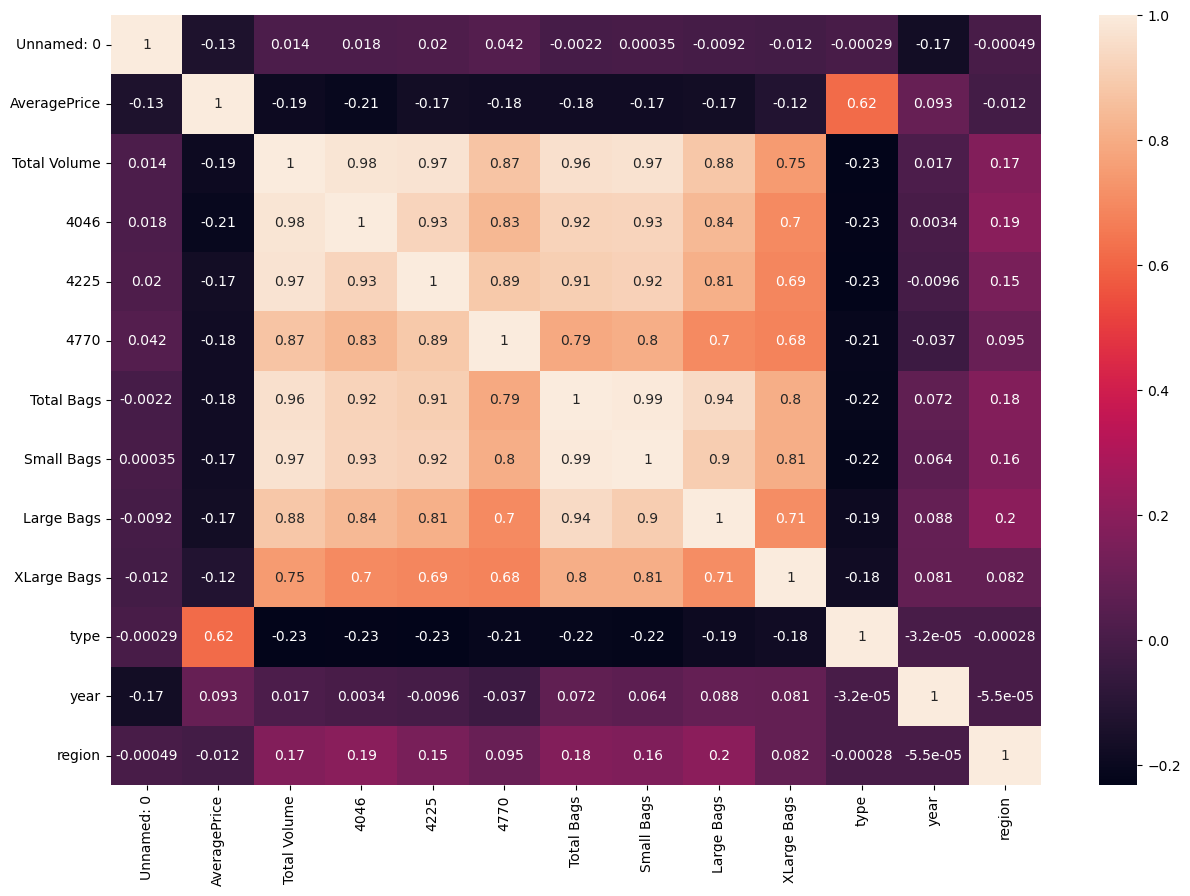

In [71]:
plt.figure(figsize=(15,10))
sns.heatmap(class_df.corr(),annot=True)
cor=class_df.corr()

In [72]:
#correlation with targetvariable
cor['region'].sort_values(ascending=False)

region          1.000000
Large Bags      0.198768
4046            0.192073
Total Bags      0.175256
Total Volume    0.174176
Small Bags      0.164702
4225            0.145726
4770            0.095252
XLarge Bags     0.082281
year           -0.000055
type           -0.000280
Unnamed: 0     -0.000489
AveragePrice   -0.011716
Name: region, dtype: float64

In [76]:
# Dropping irrelevant columns
class_df.drop("Date",axis=1, inplace=True)
class_df.drop("year",axis=1, inplace=True)

In [77]:
x = class_df.drop("region", axis=1)
y = class_df["region"]
x


Unnamed: 0  AveragePrice  Total Volume     4046       4225    4770  \
0               0          1.33      64236.62  1036.74   54454.85   48.16   
1               1          1.35      54876.98   674.28   44638.81   58.33   
2               2          0.93     118220.22   794.70  109149.67  130.50   
3               3          1.08      78992.15  1132.00   71976.41   72.58   
4               4          1.28      51039.60   941.48   43838.39   75.78   
...           ...           ...           ...      ...        ...     ...   
18244           7          1.63      17074.83  2046.96    1529.20    0.00   
18245           8          1.71      13888.04  1191.70    3431.50    0.00   
18246           9          1.87      13766.76  1191.92    2452.79  727.94   
18247          10          1.93      16205.22  1527.63    2981.04  727.01   
18248          11          1.62      17489.58  2894.77    2356.13  224.53   

       Total Bags  Small Bags  Large Bags  XLarge Bags  type  
0         8696.87     8603.62       93.25          0.0     0  
1         9505.56     9408.07       97.49          0.0     0  
2         8145.35     8042.21      103.14          0.0     0  
3         5811.16     5677.40      133.76          0.0     0  
4         6183.95     5986.26      197.69          0.0     0  
...           ...         ...         ...          ...   ...  
18244    13498.67    13066.82      431.85          0.0     1  
18245     9264.84     8940.04      324.80          0.0     1  
18246     9394.11     9351.80       42.31          0.0     1  
18247    10969.54    10919.54       50.00          0.0     1  
18248    12014.15    11988.14       26.01          0.0     1  

[18249 rows x 11 columns]

In [78]:
y

0         0
1         0
2         0
3         0
4         0
         ..
18244    53
18245    53
18246    53
18247    53
18248    53
Name: region, Length: 18249, dtype: int32

In [79]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [80]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"] = x.columns


vif

VIF values      Features
0   1.036026e+00    Unnamed: 0
1   1.708597e+00  AveragePrice
2   4.919440e+09  Total Volume
3   6.600171e+08          4046
4   5.980301e+08          4225
5   4.763436e+06          4770
6   2.370316e+14    Total Bags
7   1.364727e+14    Small Bags
8   1.448103e+13    Large Bags
9   7.621400e+10   XLarge Bags
10  1.689393e+00          type

In [81]:
x.drop('Total Volume',inplace=True,axis=1)
x.drop('Total Bags',axis=True,inplace=True)

In [82]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

VIF values      Features
0    1.034688    Unnamed: 0
1    1.708412  AveragePrice
2   10.061400          4046
3   13.472625          4225
4    5.378704          4770
5   19.342873    Small Bags
6    5.544875    Large Bags
7    3.414144   XLarge Bags
8    1.686706          type

# Model Building

In [83]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    DTC = DecisionTreeClassifier()
    DTC.fit(x_train, y_train)
    pred = DTC.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.7968949771689497  on Random_state  90


In [84]:
#spliting the data 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=90)

In [85]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score

# Decision Tree Classifier

In [86]:
# Checking Accuracy for Decision Tree Classifier
DTC = DecisionTreeClassifier()
DTC.fit(x_train,y_train)
predDTC = DTC.predict(x_test)
print(accuracy_score(y_test, predDTC))
print(confusion_matrix(y_test, predDTC))
print(classification_report(y_test,predDTC))

0.793972602739726
[[47  0  0 ...  0  0  0]
 [ 0 48  0 ...  0  0  1]
 [ 0  0 80 ...  0  0  1]
 ...
 [ 0  0  0 ... 59  0  0]
 [ 0  0  0 ...  1 62  0]
 [ 0  1  2 ...  0  0 54]]
              precision    recall  f1-score   support

           0       0.84      0.80      0.82        59
           1       0.76      0.75      0.76        64
           2       0.87      0.88      0.87        91
           3       0.82      0.72      0.77        80
           4       0.77      0.76      0.76        62
           5       0.68      0.76      0.72        51
           6       0.93      0.93      0.93        57
           7       0.87      0.82      0.85        74
           8       0.94      0.84      0.89        57
           9       0.86      0.80      0.83        69
          10       0.78      0.64      0.70        70
          11       0.84      0.85      0.84        54
          12       0.91      0.79      0.85        66
          13       0.78      0.73      0.75        71
          14   

# Logistic Regression

In [87]:
# Checking accuracy for Logistic Regression Classifier
LR = LogisticRegression()
LR.fit(x_train,y_train)
predLR = LR.predict(x_test)
print(accuracy_score(y_test, predLR))
print(confusion_matrix(y_test, predLR))
print(classification_report(y_test,predLR))

0.31726027397260276
[[24  0  0 ...  0  0  0]
 [ 3 16  0 ...  0  0  0]
 [ 0  3 31 ...  0  0  0]
 ...
 [ 0  0  0 ... 59  0  0]
 [ 0  0  0 ...  0 40  0]
 [ 1  0  0 ...  0  0 16]]
              precision    recall  f1-score   support

           0       0.16      0.41      0.23        59
           1       0.38      0.25      0.30        64
           2       0.86      0.34      0.49        91
           3       0.42      0.24      0.30        80
           4       0.39      0.35      0.37        62
           5       0.11      0.22      0.15        51
           6       0.52      0.68      0.59        57
           7       0.31      0.30      0.30        74
           8       0.15      0.54      0.24        57
           9       0.38      0.41      0.39        69
          10       0.22      0.16      0.18        70
          11       0.16      0.46      0.24        54
          12       0.37      0.29      0.32        66
          13       0.54      0.39      0.46        71
          14 

# Random Forest Classifier

In [88]:
# Checking accuracy for Random Forest Classifier
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC = RFC.predict(x_test)
print(accuracy_score(y_test, predRFC))
print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test,predRFC))

0.9104109589041096
[[54  0  0 ...  0  0  0]
 [ 0 57  0 ...  0  0  0]
 [ 0  0 89 ...  0  0  0]
 ...
 [ 0  0  0 ... 59  0  0]
 [ 0  0  0 ...  1 63  0]
 [ 0  1  0 ...  0  0 61]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        59
           1       0.86      0.89      0.88        64
           2       0.96      0.98      0.97        91
           3       0.94      0.85      0.89        80
           4       0.89      0.90      0.90        62
           5       0.78      0.82      0.80        51
           6       1.00      0.96      0.98        57
           7       0.97      0.89      0.93        74
           8       0.98      0.98      0.98        57
           9       0.90      0.91      0.91        69
          10       0.97      0.86      0.91        70
          11       0.96      0.94      0.95        54
          12       1.00      0.92      0.96        66
          13       0.90      0.86      0.88        71
          14  

# Support vector machine

In [89]:
# Checking accuracy for Support Vector Machine Classifier
svc = SVC()
svc.fit(x_train,y_train)
predsvc = svc.predict(x_test)
print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test,predsvc))

0.243013698630137
[[10  0  0 ...  0  0  0]
 [ 4 13  0 ...  0  0  5]
 [ 4  0 21 ...  0  0  0]
 ...
 [ 0  0  0 ... 51  2  0]
 [ 0  0  0 ...  0 37  0]
 [ 5  1  0 ...  0  0 21]]
              precision    recall  f1-score   support

           0       0.05      0.17      0.07        59
           1       0.46      0.20      0.28        64
           2       0.68      0.23      0.34        91
           3       0.00      0.00      0.00        80
           4       0.36      0.27      0.31        62
           5       0.07      0.33      0.12        51
           6       0.91      0.56      0.70        57
           7       0.00      0.00      0.00        74
           8       0.28      0.53      0.36        57
           9       0.81      0.19      0.31        69
          10       0.12      0.01      0.03        70
          11       0.12      0.46      0.20        54
          12       0.80      0.30      0.44        66
          13       0.85      0.32      0.47        71
          14   

# Knn method

In [90]:
# Checking accuracy for KNeighbors Classifier
knn = KNN()
knn.fit(x_train,y_train)
predknn = knn.predict(x_test)
print(accuracy_score(y_test, predknn))
print(confusion_matrix(y_test, predknn))
print(classification_report(y_test,predknn))

0.2997260273972603
[[12  3  1 ...  0  0  0]
 [ 1 28  1 ...  0  0  0]
 [ 1  3 39 ...  0  0  0]
 ...
 [ 0  0  0 ... 57  2  0]
 [ 0  0  1 ...  0 39  0]
 [ 2  6  0 ...  0  0 20]]
              precision    recall  f1-score   support

           0       0.06      0.20      0.09        59
           1       0.15      0.44      0.22        64
           2       0.28      0.43      0.34        91
           3       0.11      0.23      0.14        80
           4       0.13      0.31      0.19        62
           5       0.08      0.24      0.12        51
           6       0.61      0.67      0.64        57
           7       0.14      0.19      0.16        74
           8       0.33      0.61      0.43        57
           9       0.23      0.29      0.25        69
          10       0.06      0.10      0.08        70
          11       0.20      0.37      0.26        54
          12       0.31      0.33      0.32        66
          13       0.29      0.35      0.32        71
          14  

# Cross Validation Score

In [91]:
from sklearn.model_selection import cross_val_score
# cv score for Decision Tree Classifier
print(cross_val_score(DTC,x,y,cv=5).mean())


0.5458300979438915


In [92]:
# cv score for Random Forest Classifier
print(cross_val_score(RFC,x,y,cv=5).mean())

0.6786015008803312


In [93]:
# cv score for Logistic Regression Classifier
print(cross_val_score(LR,x,y,cv=5).mean())

0.25781370013176813


In [95]:
# cv score for Support Vector  Classifier
print(cross_val_score(svc,x,y,cv=5).mean())

0.20756560814184408


In [96]:
# cv score for KNN Classifier
print(cross_val_score(knn,x,y,cv=5).mean())

0.1884423805358571


# Hyperparameter Tuning

In [97]:
from sklearn.model_selection import GridSearchCV
# Random forest classifier
rfc=RandomForestClassifier()
parameters={"n_estimators":[10,50,100,120,150],"max_features": ["auto", "sqrt", "log2"]}

In [98]:
GCV=GridSearchCV(rfc,parameters,cv=5)
GCV.fit(x_train,y_train)
print(GCV.best_params_)

{'max_features': 'auto', 'n_estimators': 100}


In [99]:
region_model = RandomForestClassifier(max_features='auto',n_estimators=150 )
region_model.fit(x_train, y_train)
pred = region_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

91.26027397260273


From this we can know that Random Forest Classifier predicts very good Accuracy of 91%

# Model Saving

In [100]:
import joblib
joblib.dump(region_model,"Avacado_region.pkl")

['Avacado_region.pkl']

# Prediction

In [101]:
model=joblib.load("Avacado_region.pkl")

#Prediction
prediction = model.predict(x_test)
prediction

array([41, 35, 21, ...,  9, 20, 52])

# AUC-ROC curve

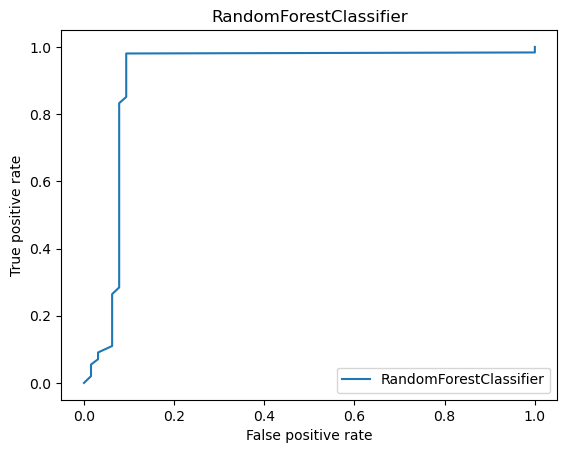

In [104]:
tpr,fpr,thresholds = roc_curve(y_test,prediction,pos_label=True)
plt.plot(fpr,tpr,label = 'RandomForestClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('RandomForestClassifier')
plt.legend(loc='lower right')
plt.show()

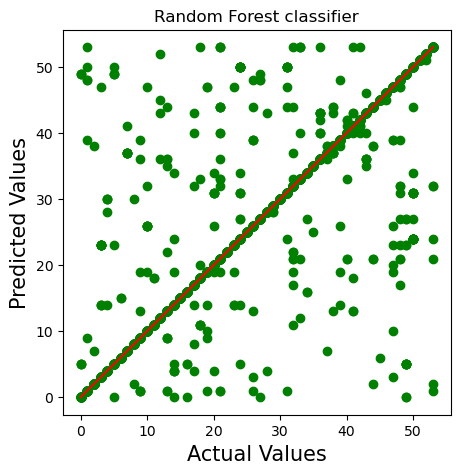

In [108]:
plt.figure(figsize=(5,5))
plt.scatter(y_test, prediction, c='g')
plt1 = max(max(prediction), max(y_test))
plt2 = min(min(prediction), min(y_test))
plt.plot([plt1, plt2], [plt1, plt2], 'r')
plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predicted Values', fontsize=15)
plt.title("Random Forest classifier")
plt.show()

From this we can conclude Random Forest Method Predicts good accuracy for this Dataset